<a href="https://colab.research.google.com/github/24sureshkumar/Car-Dheko---Used-Car-Price-Prediction/blob/main/CARDEKHO_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
bangalore=pd.read_csv('/content/drive/MyDrive/Cardekho/converted_bangalore_cars.csv')
chennai = pd.read_csv('/content/drive/MyDrive/Cardekho/converted_chennai_cars.csv')
delhi = pd.read_csv('/content/drive/MyDrive/Cardekho/converted_delhi_cars.CSV')
hyderabad = pd.read_csv('/content/drive/MyDrive/Cardekho/converted_hyderabad_cars.csv')
jaipur = pd.read_csv('/content/drive/MyDrive/Cardekho/converted_jaipur_cars.csv' )
kolkata = pd.read_csv('/content/drive/MyDrive/Cardekho/converted_kolkata_cars.csv')

# **Add a city name of each dataset and concat**

In [ ]:
bangalore['city'] = 'bangalore'
chennai['city'] = 'chennai'
delhi['city'] = 'delhi'
hyderabad['city'] = 'hyderabad'
jaipur['city'] = 'jaipur'
kolkata['city'] = 'kolkata'

In [ ]:
all_data = pd.concat([bangalore, chennai, delhi, hyderabad, jaipur, kolkata], ignore_index=True)
all_data.to_csv('/content/drive/MyDrive/Cardekho/all_data.csv',index=False)

In [ ]:
import pandas as pd
all_data = pd.read_csv('/content/drive/MyDrive/Cardekho/all_data.csv',index_col=False)

<ipython-input-19-5799326feca8>:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  all_data = pd.read_csv('/content/drive/MyDrive/Cardekho/all_data.csv',index_col=False)


#**All price converted in rupee**


In [ ]:
def price_converted(rupee):
  rupee=rupee.replace(',','').replace('₹','').strip()
  if 'Lakh' in rupee:
    return float(rupee.replace('Lakh','')) * 100000
  elif 'Crore' in rupee:
    return float(rupee.replace('Crore','')) * 10000000
  else:
    return float(rupee)
all_data['price'] = all_data['price'].apply(price_converted)

# **To remove unwanted characteristic**

In [ ]:
def clean_data(new):
    new = new.astype(str)
    return new.replace({',':'','-':' '},regex = True)

for j in all_data.columns:
    all_data[j] = clean_data(all_data[j])
    all_data[j] = all_data[j].str.strip()

all_data[['Max Torque','Torque in Rpm']] = all_data['Max Torque'].str.split('@',expand = True,n=1)
all_data['Max Torque'] = all_data['Max Torque'].str.extract('(\d+)')
all_data['Torque in Rpm'] = all_data['Torque in Rpm'].str.extract('(\d+)')

all_data[['Power', 'Power in RPM']] = all_data['Max Power'].str.split('@', expand=True, n=1)
all_data['Power'] = all_data['Power'].str.extract('(\d+)')
all_data['Power in RPM'] = all_data['Power in RPM'].str.extract('(\d+)')

all_data['Registration Year'] = all_data['Registration Year'].str.extract('(\d{4})')
all_data['Top Speed'] = all_data['Top Speed'].str.extract('(\d+)')
all_data['Acceleration'] = all_data['Acceleration'].str.extract('(\d+)')
all_data['Turning Radius'] = all_data['Turning Radius'].str.extract('(\d+)')
all_data['Torque'] = all_data['Torque'].str.extract('(\d+)')
all_data['Alloy Wheel Size'] = all_data['Alloy Wheel Size'].str.extract('(\d+)')
all_data['Mileage'] = all_data['Mileage'].str.extract('(\d+)')
all_data['Max Power'] = all_data['Max Power'].str.extract('(\d+)')
all_data['Cargo Volumn'] = all_data['Cargo Volumn'].str.extract('(\d+)')
all_data['Seating Capacity'] = all_data['Seating Capacity'].str.extract('(\d+)')
all_data['owner'] = all_data['owner'].str.extract('(\d+)')
all_data['Kms Driven'] = all_data['Kms Driven'].str.extract('(\d+)')
all_data['Engine Displacement'] = all_data['Engine Displacement'].str.extract('(\d+)')
all_data['Length'] = all_data['Length'].str.extract('(\d+)')
all_data['Width'] = all_data['Width'].str.extract('(\d+)')
all_data['Height'] = all_data['Height'].str.extract('(\d+)')
all_data['Front Tread'] = all_data['Front Tread'].str.extract('(\d+)')
all_data['Rear Tread'] = all_data['Rear Tread'].str.extract('(\d+)')
all_data['Kerb Weight'] = all_data['Kerb Weight'].str.extract('(\d+)')
all_data['Gross Weight'] = all_data['Gross Weight'].str.extract('(\d+)')
all_data['Wheel Base'] = all_data['Wheel Base'].str.extract('(\d+)')
all_data['Engine'] = all_data['Engine'].str.extract('(\d+)')


# **Drop Unwanted and Duplicate columns**

In [ ]:
clear_column = ['ft','km','ownerNo','trendingText','imgUrl','heading','desc','Seats',
            'Year of Manufacture','Displacement','Torque','Seats.1',
                'priceFixedText','priceActual','priceSaving','Alloy Wheel Size',
                'Power','Ground Clearance Unladen','car_links','BoreX Stroke','Registration Year','Compression Ratio','transmission']
for data in clear_column:
   all_data = all_data.drop(data,axis=1)


# **Change the Datatype**

In [ ]:
all_data['it'] = pd.to_numeric(all_data['it'],errors='coerce')
all_data['Kms Driven'] = pd.to_numeric(all_data['Kms Driven'],errors='coerce')
#all_data['owner'] = pd.to_numeric(all_data['owner'],errors='coerce')
#all_data['modelYear'] = pd.to_numeric(all_data['modelYear'],errors='coerce')
all_data['centralVariantId'] = pd.to_numeric(all_data['centralVariantId'],errors='coerce')
all_data['price'] = pd.to_numeric(all_data['price'],errors='coerce')
#all_data['Engine Displacement'] = pd.to_numeric(all_data['Engine Displacement'],errors='coerce')
all_data['top_features'] = pd.to_numeric(all_data['top_features'],errors='coerce')
all_data['Comfort & Convenience'] = pd.to_numeric(all_data['Comfort & Convenience'],errors='coerce')
all_data['Entertainment & Communication'] = pd.to_numeric(all_data['Entertainment & Communication'],errors='coerce')
all_data['Safety'] = pd.to_numeric(all_data['Safety'],errors='coerce')
all_data['Interior'] = pd.to_numeric(all_data['Interior'],errors='coerce')
all_data['Exterior'] = pd.to_numeric(all_data['Exterior'],errors='coerce')
all_data['Mileage'] = pd.to_numeric(all_data['Mileage'],errors='coerce')
all_data['Max Power'] = pd.to_numeric(all_data['Max Power'],errors='coerce')
all_data['Max Torque'] = pd.to_numeric(all_data['Max Torque'],errors='coerce')
all_data['Power in RPM'] = pd.to_numeric(all_data['Power in RPM'],errors='coerce')
all_data['Torque in Rpm'] = pd.to_numeric(all_data['Torque in Rpm'],errors='coerce')
all_data['No of Cylinder'] = pd.to_numeric(all_data['No of Cylinder'],errors='coerce')
all_data['Values per Cylinder'] = pd.to_numeric(all_data['Values per Cylinder'],errors='coerce')
all_data['Length'] = pd.to_numeric(all_data['Length'],errors='coerce')
all_data['Width'] = pd.to_numeric(all_data['Width'],errors='coerce')
all_data['Height'] = pd.to_numeric(all_data['Height'],errors='coerce')
all_data['Front Tread'] = pd.to_numeric(all_data['Front Tread'],errors='coerce')
all_data['Rear Tread'] = pd.to_numeric(all_data['Rear Tread'],errors='coerce')
all_data['Kerb Weight'] = pd.to_numeric(all_data['Kerb Weight'],errors='coerce')
all_data['Gross Weight'] = pd.to_numeric(all_data['Gross Weight'],errors='coerce')
#all_data['Seating Capacity'] = pd.to_numeric(all_data['Seating Capacity'],errors='coerce')
all_data['Turning Radius'] = pd.to_numeric(all_data['Turning Radius'],errors='coerce')
all_data['Top Speed'] = pd.to_numeric(all_data['Top Speed'],errors='coerce')
all_data['Acceleration'] = pd.to_numeric(all_data['Acceleration'],errors='coerce')
all_data['No Door Numbers'] = pd.to_numeric(all_data['No Door Numbers'],errors='coerce')
all_data['Wheel Base']= pd.to_numeric(all_data['Wheel Base'],errors='coerce')
all_data['Cargo Volumn'] = pd.to_numeric(all_data['Cargo Volumn'],errors='coerce')
all_data['Wheel Size'] = pd.to_numeric(all_data['Wheel Size'],errors='coerce')
all_data['Engine'] = pd.to_numeric(all_data['Engine'],errors='coerce')


# **Identify the distribution on Numerical columns**

           it  centralVariantId         price    Kms Driven  top_features  \
count  8369.0       8369.000000  8.369000e+03  8.367000e+03   8369.000000   
mean      0.0       4962.537340  9.569037e+05  5.898840e+04      8.785160   
std       0.0       2747.040479  1.416203e+06  7.406424e+04      0.911979   
min       0.0          5.000000  2.016100e+04  1.010000e+02      0.000000   
25%       0.0       2042.000000  3.990000e+05  3.000000e+04      9.000000   
50%       0.0       5320.000000  6.010000e+05  5.370000e+04      9.000000   
75%       0.0       7121.000000  9.500000e+05  8.000000e+04      9.000000   
max       0.0      11098.000000  4.150000e+07  5.500000e+06      9.000000   

       Comfort & Convenience     Interior     Exterior       Safety  \
count            8301.000000  8292.000000  8279.000000  8273.000000   
mean               15.734610    10.303304    10.755647    23.112293   
std                 6.403504     2.430612     4.735766     6.875646   
min                 1.

<ipython-input-24-f99671f33cc5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  se.kdeplot(all_data[col],shade = True)
<ipython-input-24-f99671f33cc5>:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  se.kdeplot(all_data[col],shade = True)


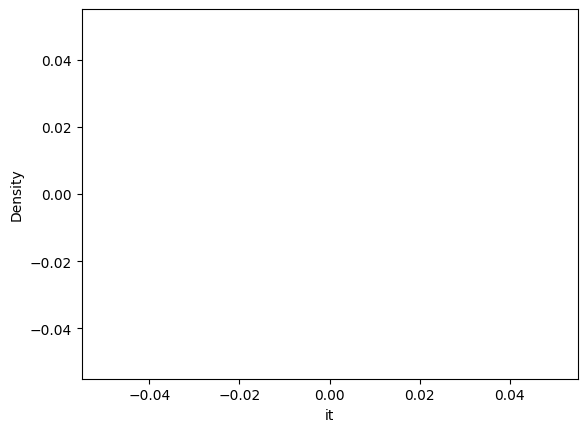

<Figure size 400x200 with 0 Axes>

<ipython-input-24-f99671f33cc5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  se.kdeplot(all_data[col],shade = True)


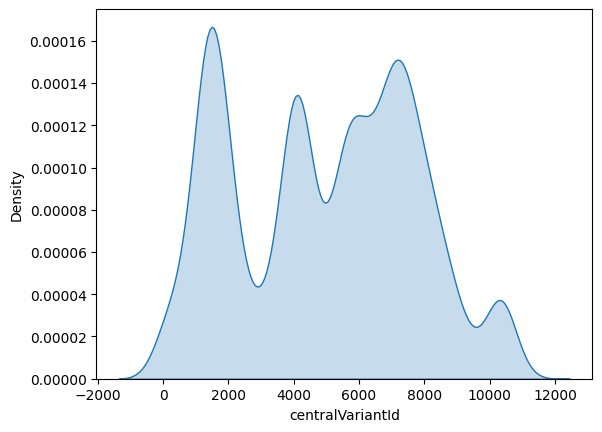

<Figure size 400x200 with 0 Axes>

<ipython-input-24-f99671f33cc5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  se.kdeplot(all_data[col],shade = True)


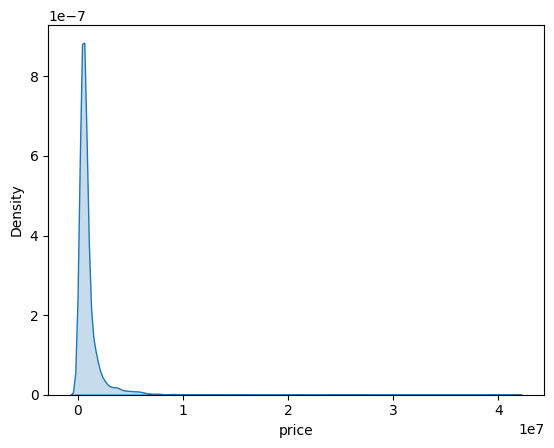

<Figure size 400x200 with 0 Axes>

<ipython-input-24-f99671f33cc5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  se.kdeplot(all_data[col],shade = True)


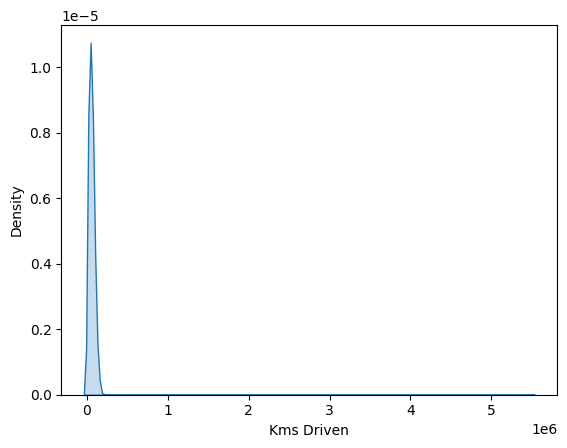

<Figure size 400x200 with 0 Axes>

<ipython-input-24-f99671f33cc5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  se.kdeplot(all_data[col],shade = True)


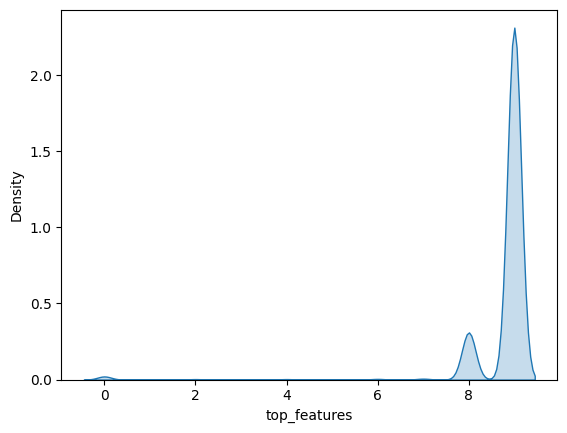

<Figure size 400x200 with 0 Axes>

<ipython-input-24-f99671f33cc5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  se.kdeplot(all_data[col],shade = True)


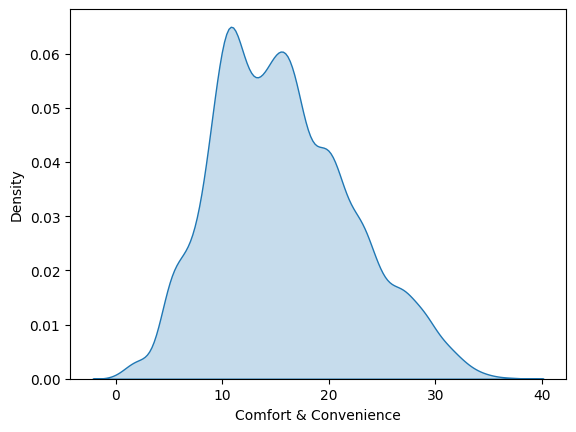

<Figure size 400x200 with 0 Axes>

<ipython-input-24-f99671f33cc5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  se.kdeplot(all_data[col],shade = True)


<Figure size 400x200 with 0 Axes>

<ipython-input-24-f99671f33cc5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  se.kdeplot(all_data[col],shade = True)


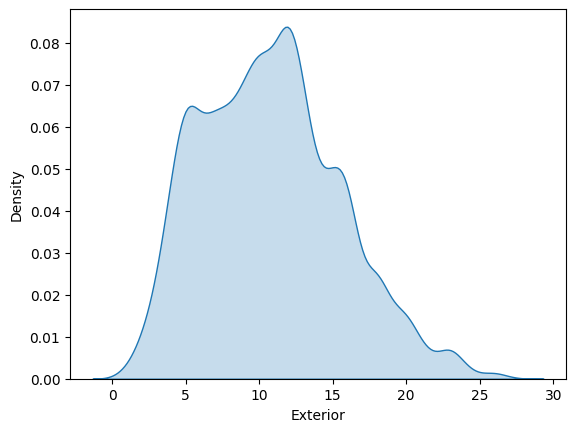

<Figure size 400x200 with 0 Axes>

<ipython-input-24-f99671f33cc5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  se.kdeplot(all_data[col],shade = True)


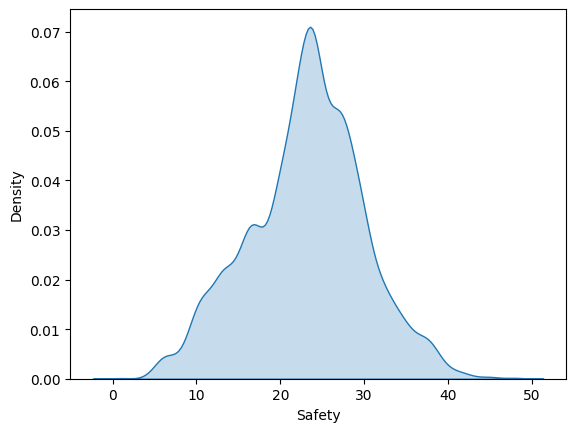

<Figure size 400x200 with 0 Axes>

<ipython-input-24-f99671f33cc5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  se.kdeplot(all_data[col],shade = True)


<Figure size 400x200 with 0 Axes>

<ipython-input-24-f99671f33cc5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  se.kdeplot(all_data[col],shade = True)


<Figure size 400x200 with 0 Axes>

<ipython-input-24-f99671f33cc5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  se.kdeplot(all_data[col],shade = True)


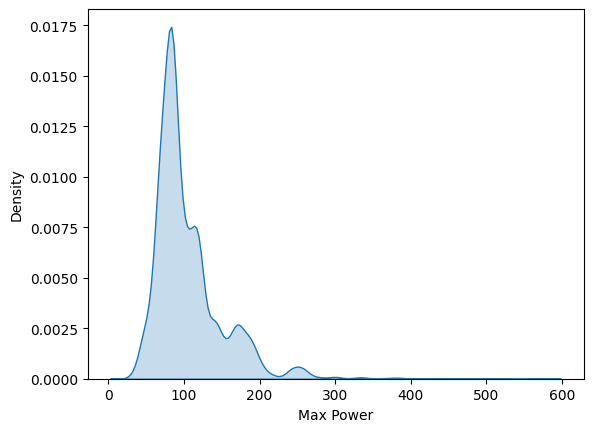

<Figure size 400x200 with 0 Axes>

<ipython-input-24-f99671f33cc5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  se.kdeplot(all_data[col],shade = True)


<Figure size 400x200 with 0 Axes>

<ipython-input-24-f99671f33cc5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  se.kdeplot(all_data[col],shade = True)


<Figure size 400x200 with 0 Axes>

<ipython-input-24-f99671f33cc5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  se.kdeplot(all_data[col],shade = True)


<Figure size 400x200 with 0 Axes>

<ipython-input-24-f99671f33cc5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  se.kdeplot(all_data[col],shade = True)


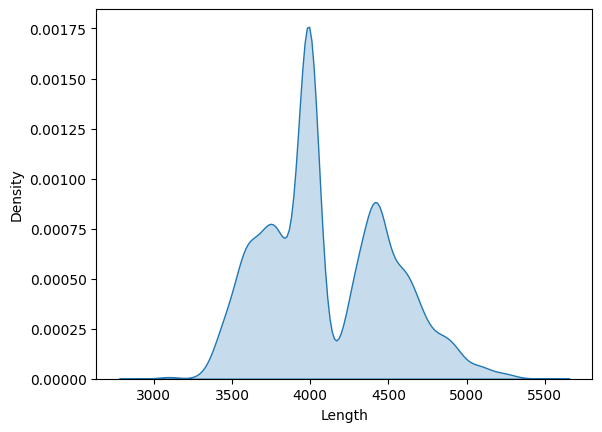

<Figure size 400x200 with 0 Axes>

<ipython-input-24-f99671f33cc5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  se.kdeplot(all_data[col],shade = True)


<Figure size 400x200 with 0 Axes>

<ipython-input-24-f99671f33cc5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  se.kdeplot(all_data[col],shade = True)


<Figure size 400x200 with 0 Axes>

<ipython-input-24-f99671f33cc5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  se.kdeplot(all_data[col],shade = True)


<Figure size 400x200 with 0 Axes>

<ipython-input-24-f99671f33cc5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  se.kdeplot(all_data[col],shade = True)


<Figure size 400x200 with 0 Axes>

<ipython-input-24-f99671f33cc5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  se.kdeplot(all_data[col],shade = True)


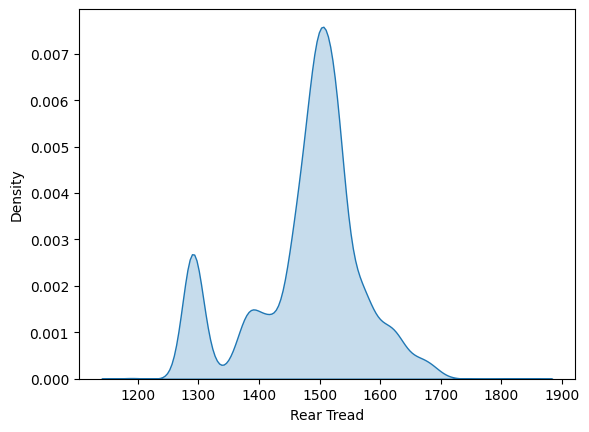

<Figure size 400x200 with 0 Axes>

<ipython-input-24-f99671f33cc5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  se.kdeplot(all_data[col],shade = True)


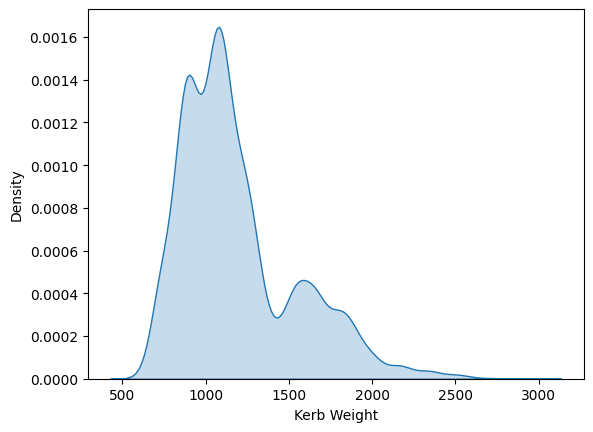

<Figure size 400x200 with 0 Axes>

<ipython-input-24-f99671f33cc5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  se.kdeplot(all_data[col],shade = True)


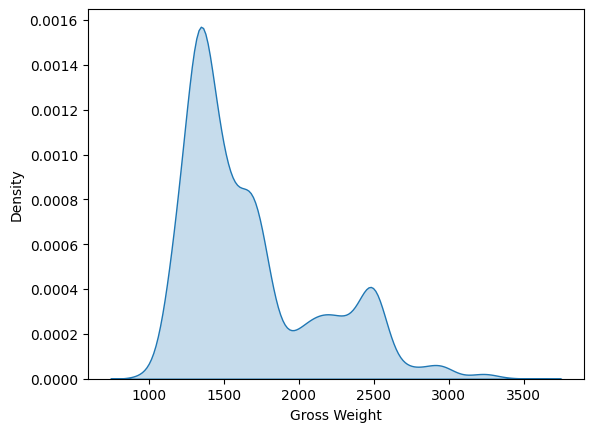

<Figure size 400x200 with 0 Axes>

<ipython-input-24-f99671f33cc5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  se.kdeplot(all_data[col],shade = True)


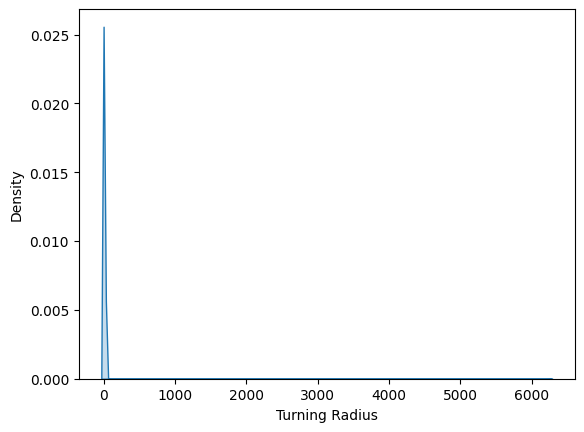

<Figure size 400x200 with 0 Axes>

<ipython-input-24-f99671f33cc5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  se.kdeplot(all_data[col],shade = True)


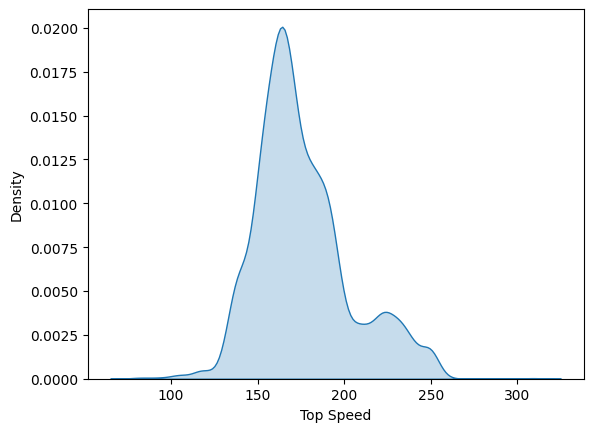

<Figure size 400x200 with 0 Axes>

<ipython-input-24-f99671f33cc5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  se.kdeplot(all_data[col],shade = True)


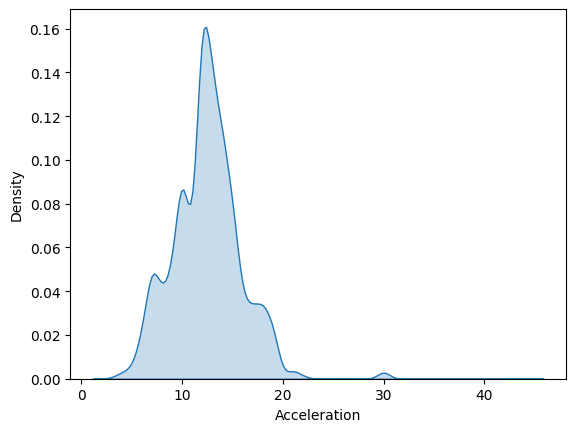

<Figure size 400x200 with 0 Axes>

<ipython-input-24-f99671f33cc5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  se.kdeplot(all_data[col],shade = True)


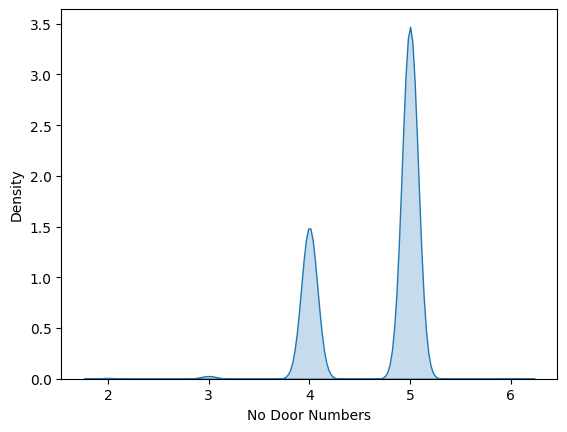

<Figure size 400x200 with 0 Axes>

<ipython-input-24-f99671f33cc5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  se.kdeplot(all_data[col],shade = True)


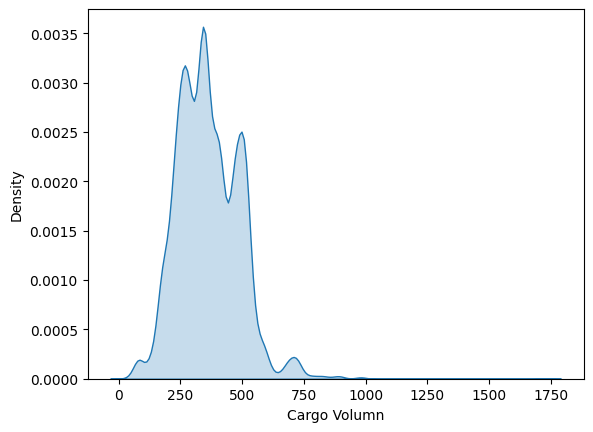

<Figure size 400x200 with 0 Axes>

<ipython-input-24-f99671f33cc5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  se.kdeplot(all_data[col],shade = True)


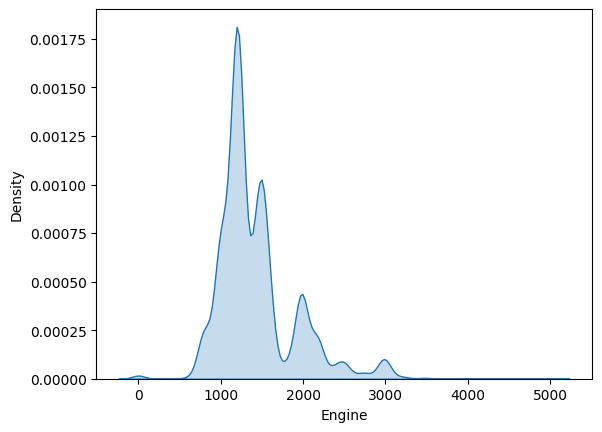

<Figure size 400x200 with 0 Axes>

<ipython-input-24-f99671f33cc5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  se.kdeplot(all_data[col],shade = True)


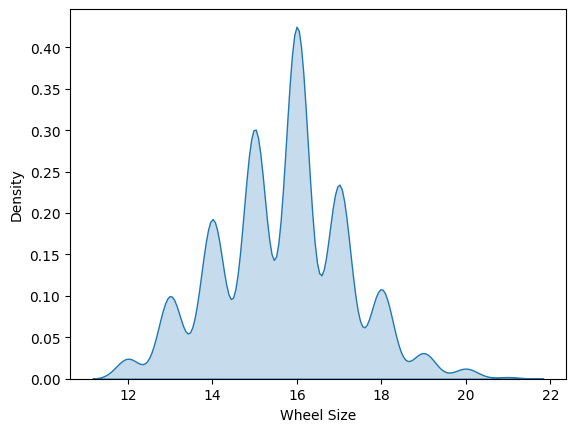

<Figure size 400x200 with 0 Axes>

<ipython-input-24-f99671f33cc5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  se.kdeplot(all_data[col],shade = True)


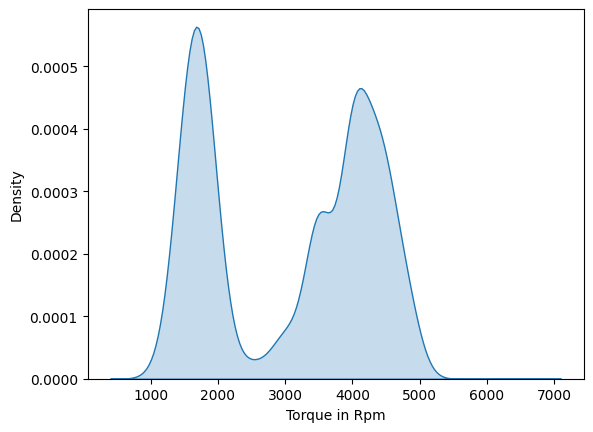

<Figure size 400x200 with 0 Axes>

<ipython-input-24-f99671f33cc5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  se.kdeplot(all_data[col],shade = True)


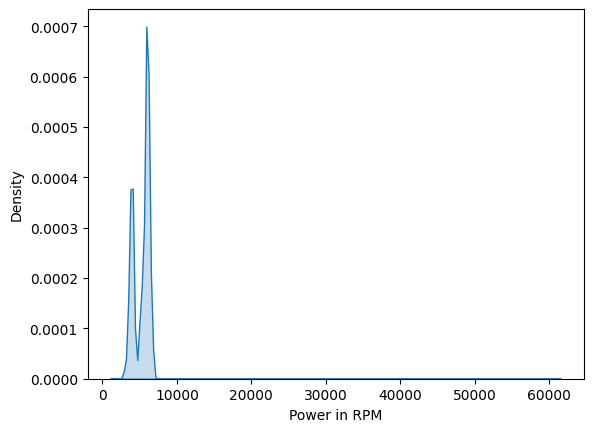

<Figure size 400x200 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as se
print(all_data.describe())
numerical_columns = all_data.select_dtypes(include = ['float64','int64']).columns
for col in numerical_columns:
    se.kdeplot(all_data[col],shade = True)
    plt.figure(figsize=(4, 2))
    plt.show()

# **To Handling the Missing values on Numerical and Cateforical columns**

In [ ]:
for col in numerical_columns:
    all_data[col].fillna(all_data[col].mean(), inplace = True)

categorical_data = all_data.select_dtypes(include = 'object').columns
for col in categorical_data:
    all_data[col].fillna(all_data[col].mode()[0], inplace = True)
all_data.dropna(inplace=True)


<ipython-input-25-7076a9425db6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_data[col].fillna(all_data[col].mean(), inplace = True)
<ipython-input-25-7076a9425db6>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [ ]:
all_data.isna().sum()

it                               0
bt                               0
owner                            0
oem                              0
model                            0
modelYear                        0
centralVariantId                 0
variantName                      0
price                            0
Insurance Validity               0
Fuel Type                        0
Kms Driven                       0
RTO                              0
Ownership                        0
Engine Displacement              0
Transmission                     0
top_features                     0
Comfort & Convenience            0
Interior                         0
Exterior                         0
Safety                           0
Entertainment & Communication    0
Mileage                          0
Color                            0
Engine Type                      0
Max Power                        0
Max Torque                       0
No of Cylinder                   0
Values per Cylinder              0
Value Configuration              0
Fuel Suppy System                0
Turbo Charger                    0
Super Charger                    0
Length                           0
Width                            0
Height                           0
Wheel Base                       0
Front Tread                      0
Rear Tread                       0
Kerb Weight                      0
Gross Weight                     0
Gear Box                         0
Drive Type                       0
Seating Capacity                 0
Steering Type                    0
Turning Radius                   0
Front Brake Type                 0
Rear Brake Type                  0
Top Speed                        0
Acceleration                     0
Tyre Type                        0
No Door Numbers                  0
Cargo Volumn                     0
Engine                           0
Wheel Size                       0
city                             0
Torque in Rpm                    0
Power in RPM                     0
dtype: int64

In [ ]:
all_data.shape

(8369, 58)

#  ***Checking outliers on numerial columns***

In [ ]:
def identify_outliers(all_data):
    numerical_columns = all_data.select_dtypes(include=['float64', 'int64']).columns
    outliers = {}

    all_data_clean = all_data.dropna(subset=numerical_columns)

    for col in numerical_columns:
        q1 = all_data_clean[col].quantile(0.25)
        q3 = all_data_clean[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers[col] = all_data_clean[(all_data_clean[col] < lower_bound) | (all_data_clean[col] > upper_bound)]

    return outliers


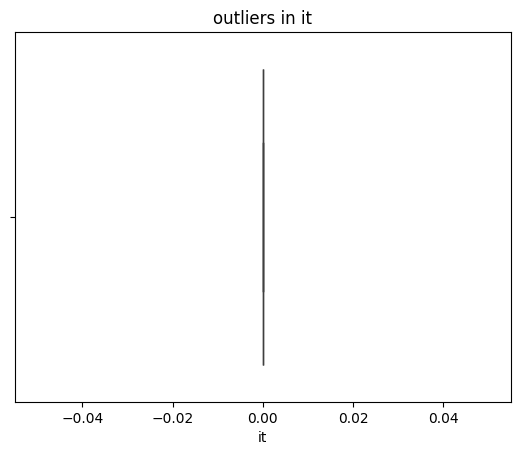

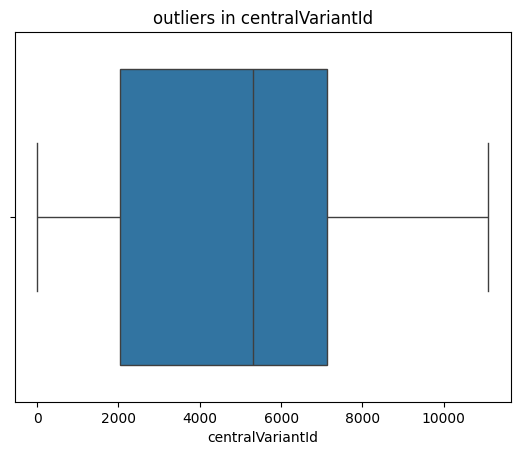

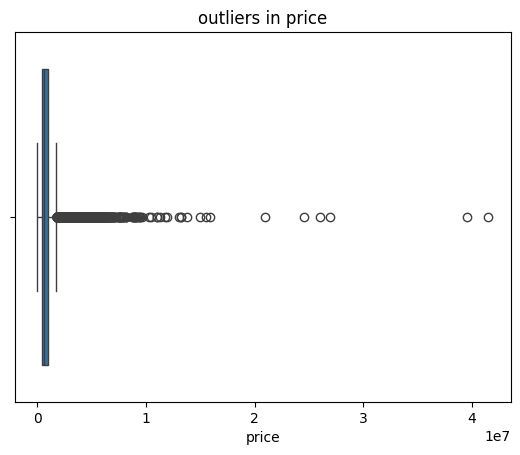

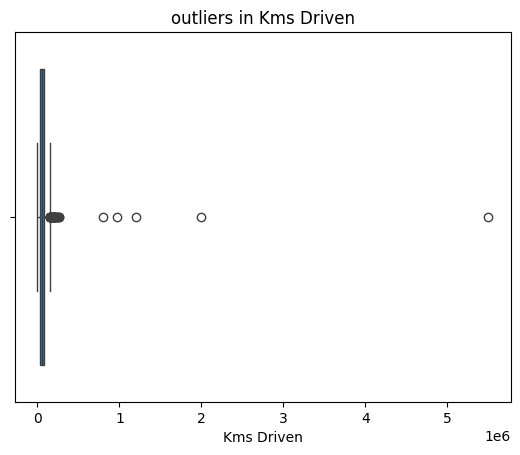

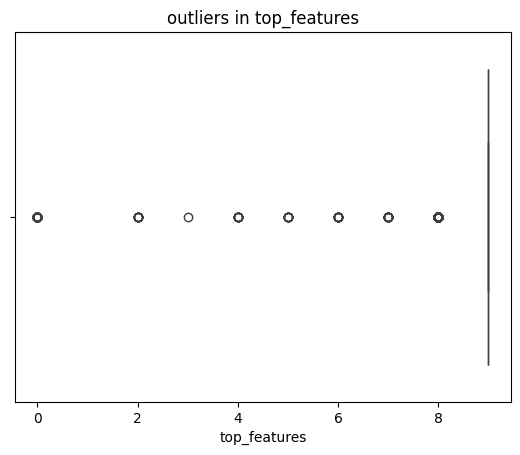

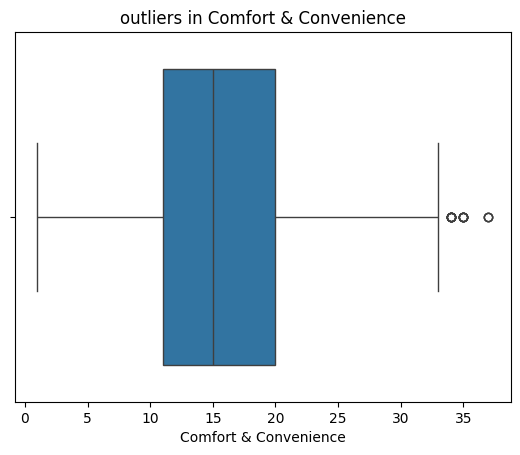

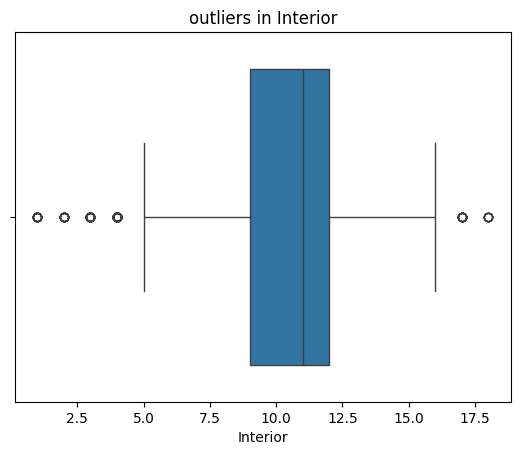

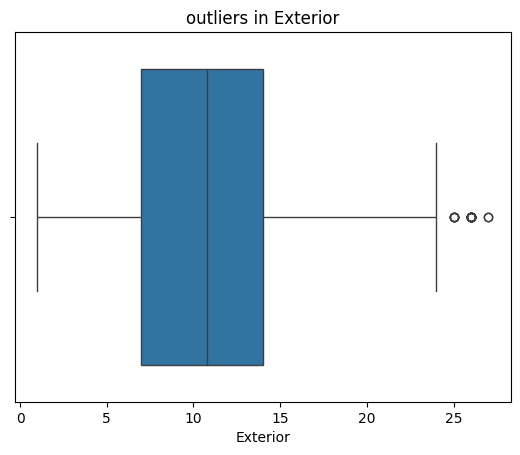

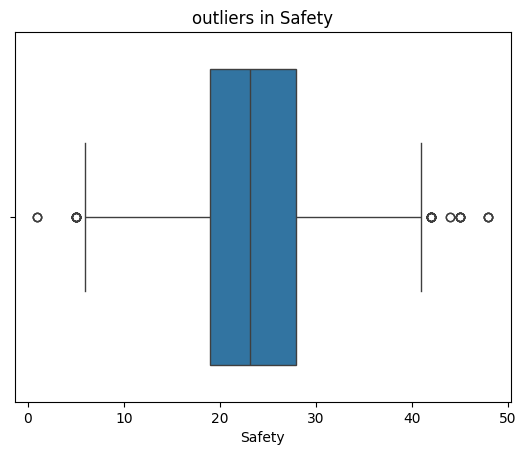

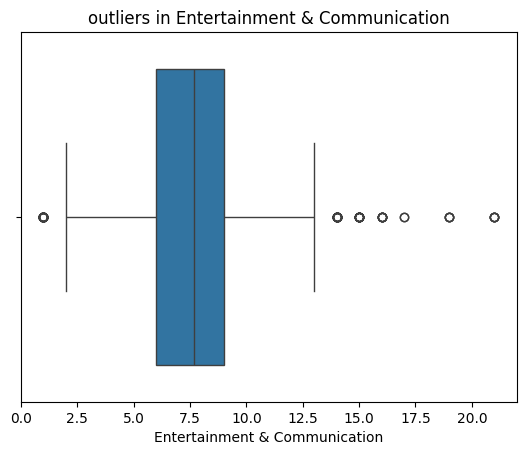

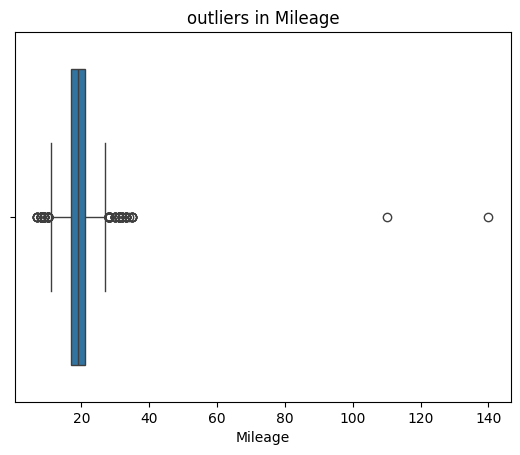

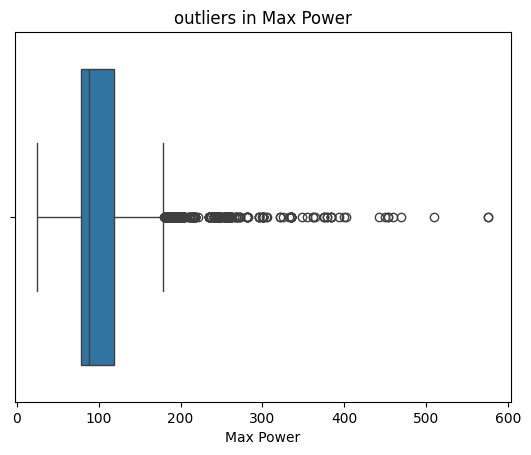

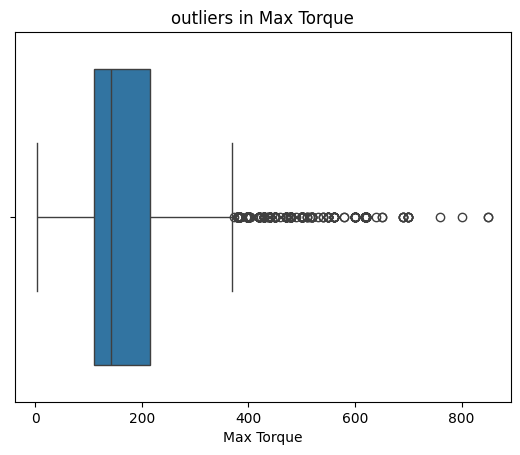

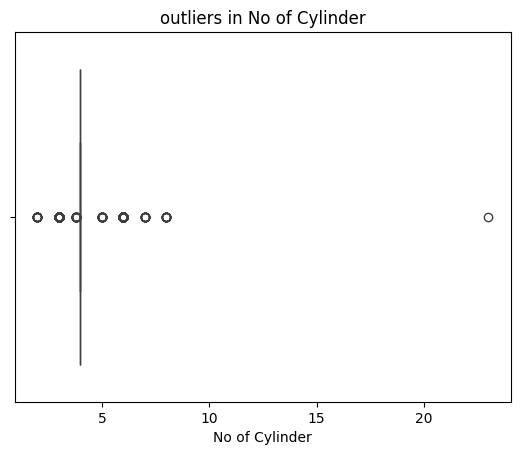

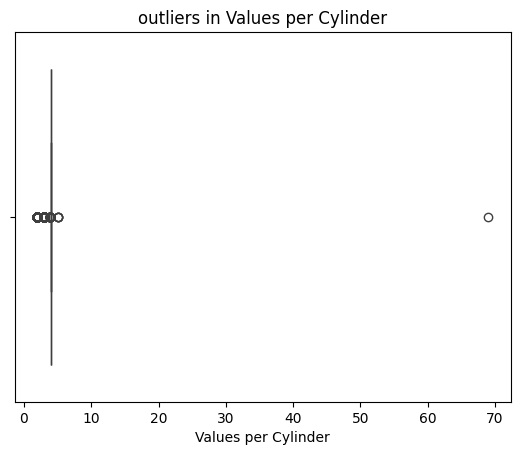

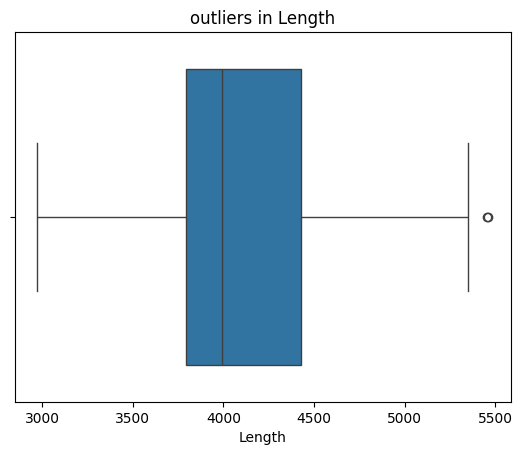

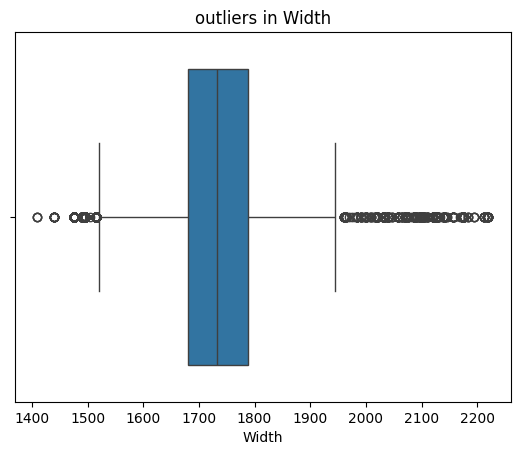

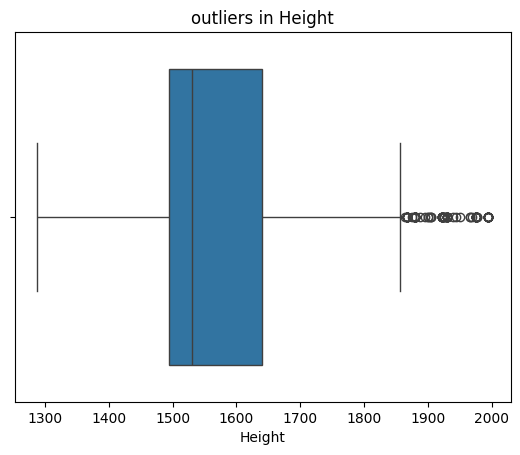

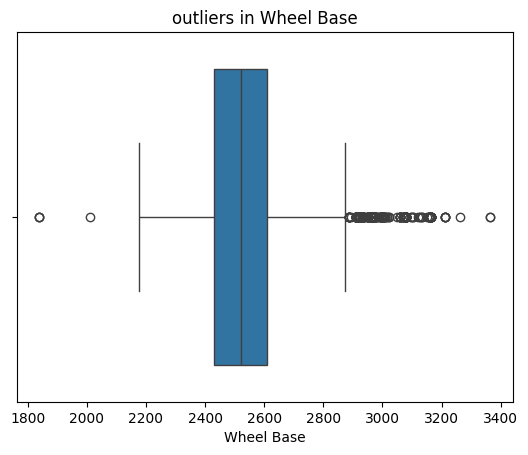

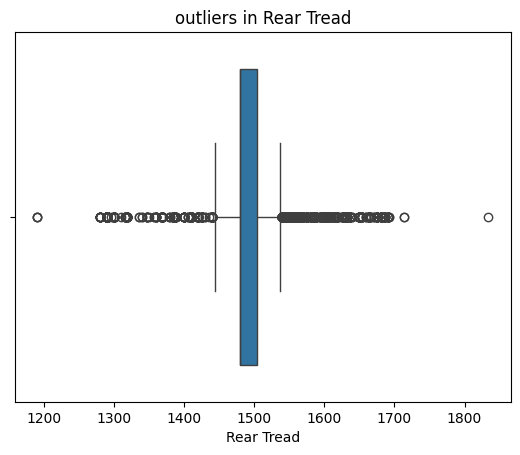

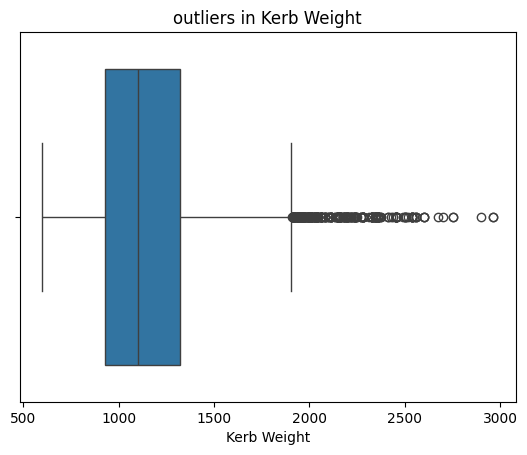

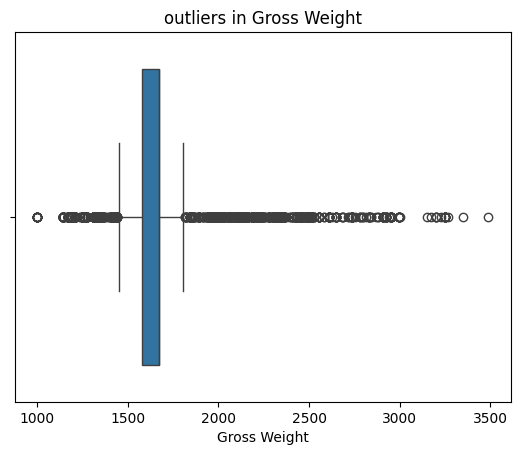

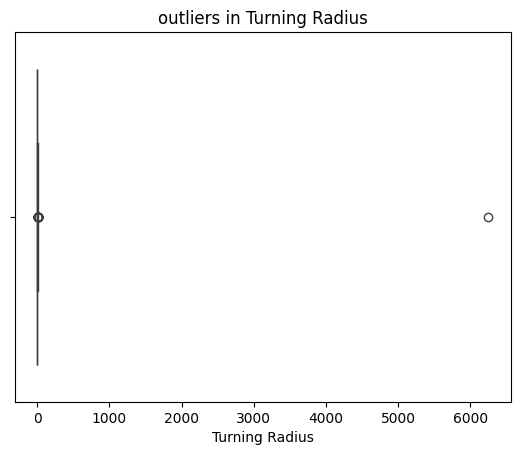

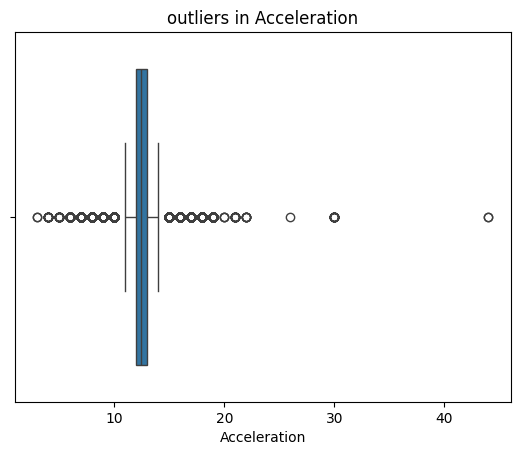

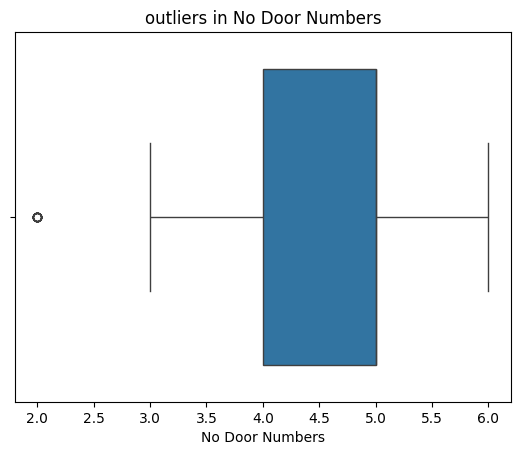

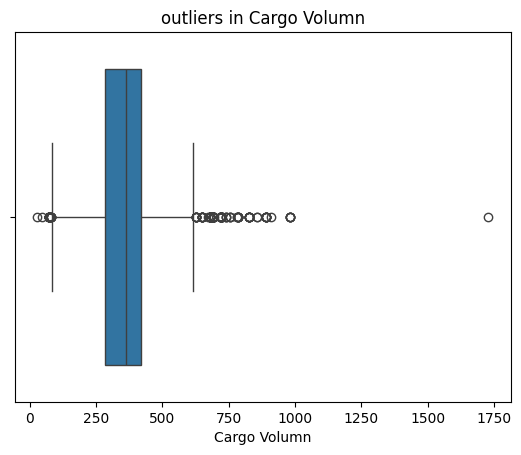

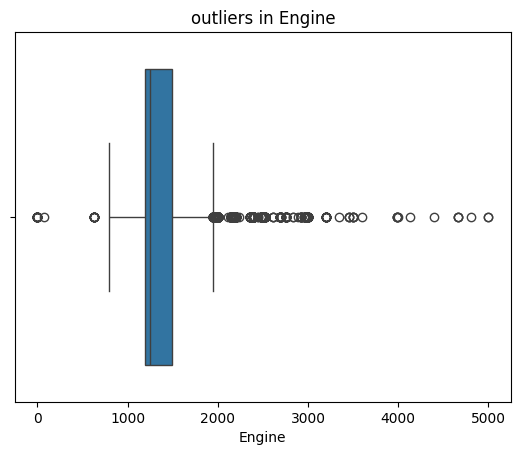

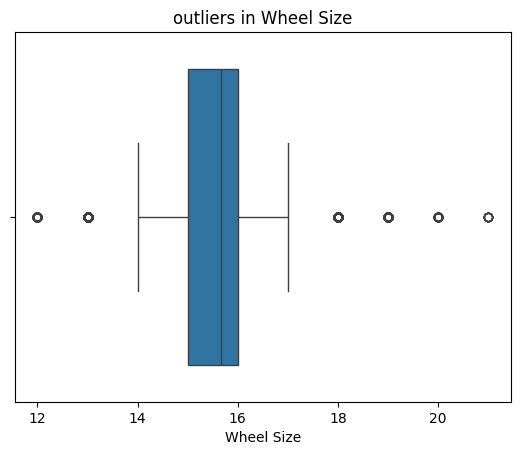

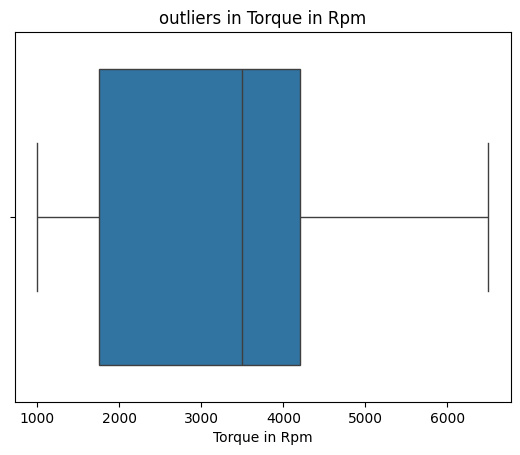

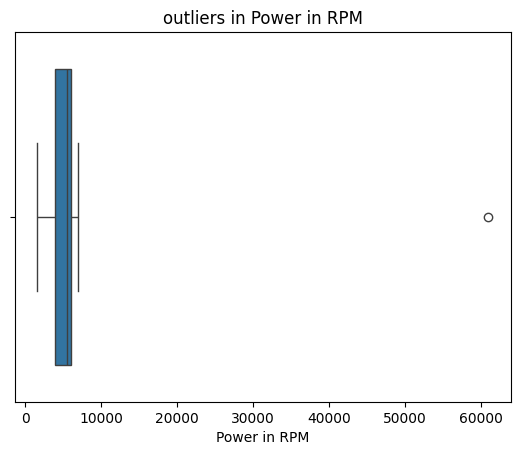

None


In [ ]:
def plt_boxplot(all_data):
    numerical_columns = all_data.select_dtypes(include=['float64', 'int64']).columns

    # Ensure no NaN values before plotting
    all_data_clean = all_data.dropna(subset=numerical_columns)

    for col in numerical_columns:
        se.boxplot(x=all_data_clean[col])
        plt.title(f"outliers in {col}")
        plt.show()
print(plt_boxplot(all_data))

# **Removing outliers and Capping on the numerical data**

In [ ]:
numerical_cols = all_data[['Power in RPM','Torque in Rpm','Cargo Volumn','No Door Numbers','Acceleration',
                           'Top Speed','Turning Radius','Gross Weight','Rear Tread','Kerb Weight','Front Tread',
                           'Wheel Base','Height','Width','Length','Values per Cylinder','No of Cylinder',
                           'Max Torque','Max Power','Entertainment & Communication','Exterior','Interior','Comfort & Convenience','top_features']]

def clean_outliers_iqr(all_data, numerical_cols, method='cap'):
    cleaned_data = all_data.copy()
    for col in numerical_cols:
        Q1 = all_data[col].quantile(0.25)
        Q3 = all_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        if method == 'remove':
            # Remove rows where outliers are present
            cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]
        if method == 'cap':
            # Cap outliers to the nearest boundary value
            cleaned_data[col] = cleaned_data[col].clip(lower=lower_bound, upper=upper_bound)

    return cleaned_data

# Clean the data by removing outliers
cleaned_data_remove = clean_outliers_iqr(all_data, numerical_cols, method='remove')
print("Data cleaned by removing outliers. Remaining rows:", cleaned_data_remove.shape[0])

# Clean the data by capping outliers
cleaned_data_cap = clean_outliers_iqr(all_data, numerical_cols, method='cap')
print("Data cleaned by capping outliers. Remaining rows:", cleaned_data_cap.shape[0])


Data cleaned by removing outliers. Remaining rows: 2375
Data cleaned by capping outliers. Remaining rows: 8369


In [ ]:
cleaned_data_cap.describe()

it  centralVariantId         price    Kms Driven  top_features  \
count  8369.0       8369.000000  8.369000e+03  8.369000e+03        8369.0   
mean      0.0       4962.537340  9.569037e+05  5.898840e+04           9.0   
std       0.0       2747.040479  1.416203e+06  7.405539e+04           0.0   
min       0.0          5.000000  2.016100e+04  1.010000e+02           9.0   
25%       0.0       2042.000000  3.990000e+05  3.000000e+04           9.0   
50%       0.0       5320.000000  6.010000e+05  5.370100e+04           9.0   
75%       0.0       7121.000000  9.500000e+05  8.000000e+04           9.0   
max       0.0      11098.000000  4.150000e+07  5.500000e+06           9.0   

       Comfort & Convenience     Interior     Exterior       Safety  \
count            8369.000000  8369.000000  8369.000000  8369.000000   
mean               15.731563    10.320451    10.751524    23.112293   
std                 6.368424     2.361721     4.697492     6.836092   
min                 1.000000     4.500000     1.000000     1.000000   
25%                11.000000     9.000000     7.000000    19.000000   
50%                15.000000    11.000000    10.755647    23.112293   
75%                20.000000    12.000000    14.000000    28.000000   
max                33.500000    16.500000    24.500000    48.000000   

       Entertainment & Communication  ...  Gross Weight  Turning Radius  \
count                    8369.000000  ...   8369.000000     8369.000000   
mean                        7.682107  ...   1634.663378        4.733468   
std                         2.246238  ...    113.383441        0.613871   
min                         1.500000  ...   1444.021160        4.000000   
25%                         6.000000  ...   1580.000000        4.000000   
50%                         7.694116  ...   1670.652560        5.000000   
75%                         9.000000  ...   1670.652560        5.000000   
max                        13.500000  ...   1806.631400        6.500000   

         Top Speed  Acceleration  No Door Numbers  Cargo Volumn       Engine  \
count  8369.000000   8369.000000      8369.000000   8369.000000  8369.000000   
mean    173.325300     12.451806         4.686826    359.723283  1424.735923   
std      11.074187      1.198785         0.481309    104.244598   477.514974   
min     151.501855     10.500000         2.500000     82.500000     0.000000   
25%     166.000000     12.000000         4.000000    285.000000  1197.000000   
50%     175.665430     12.440395         5.000000    361.887102  1248.000000   
75%     175.665430     13.000000         5.000000    420.000000  1498.000000   
max     190.163575     14.500000         6.000000    622.500000  5000.000000   

        Wheel Size  Torque in Rpm  Power in RPM  
count  8369.000000    8369.000000   8369.000000  
mean     15.664024    3084.912500   5238.469835  
std       1.194090    1202.216167   1013.456848  
min      12.000000    1000.000000   1620.000000  
25%      15.000000    1750.000000   4000.000000  
50%      15.664024    3500.000000   5550.000000  
75%      16.000000    4200.000000   6000.000000  
max      21.000000    6500.000000   9000.000000  

[8 rows x 32 columns]

# **Rechecking Outliers**

outliers detected : Empty DataFrame
Columns: [it, bt, owner, oem, model, modelYear, centralVariantId, variantName, price, Insurance Validity, Fuel Type, Kms Driven, RTO, Ownership, Engine Displacement, Transmission, top_features, Comfort & Convenience, Interior, Exterior, Safety, Entertainment & Communication, Mileage, Color, Engine Type, Max Power, Max Torque, No of Cylinder, Values per Cylinder, Value Configuration, Fuel Suppy System, Turbo Charger, Super Charger, Length, Width, Height, Wheel Base, Front Tread, Rear Tread, Kerb Weight, Gross Weight, Gear Box, Drive Type, Seating Capacity, Steering Type, Turning Radius, Front Brake Type, Rear Brake Type, Top Speed, Acceleration, Tyre Type, No Door Numbers, Cargo Volumn, Engine, Wheel Size, city, Torque in Rpm, Power in RPM]
Index: []

[0 rows x 58 columns]
         it  centralVariantId  price  Kms Driven  top_features  \
count  0.0               0.0    0.0         0.0           0.0   
mean   NaN               NaN    NaN         NaN   

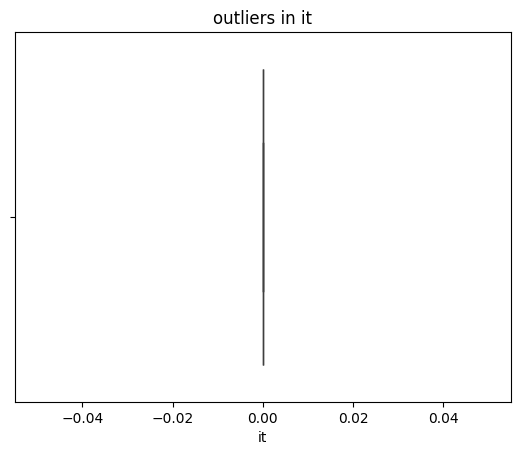

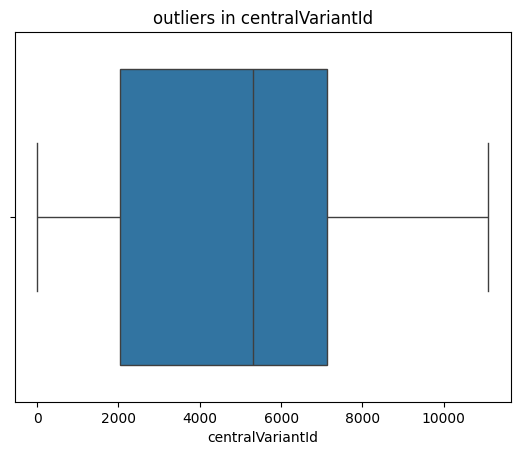

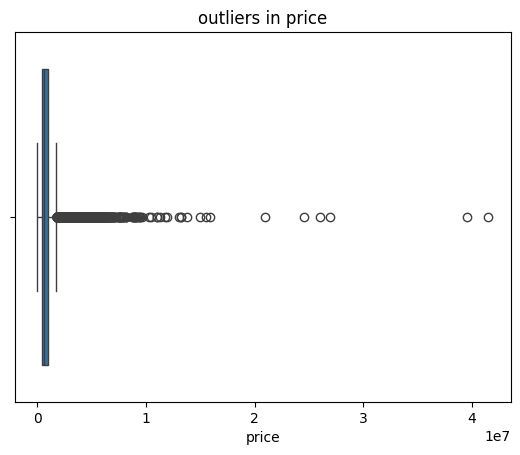

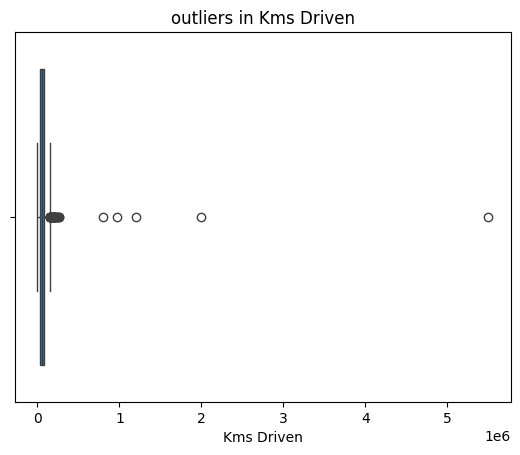

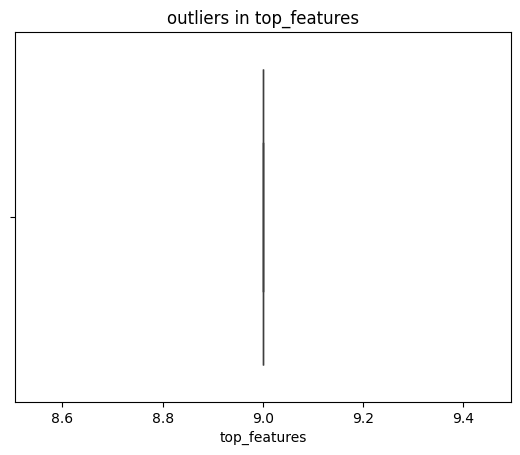

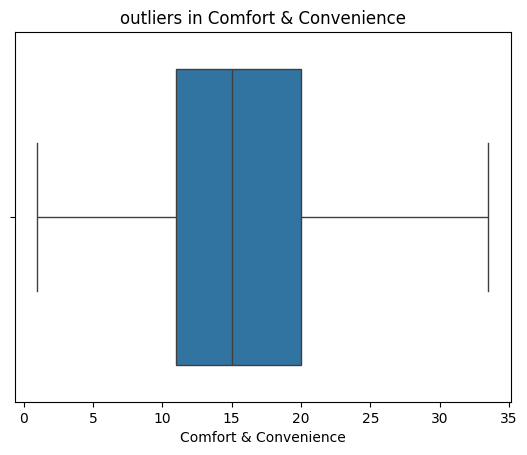

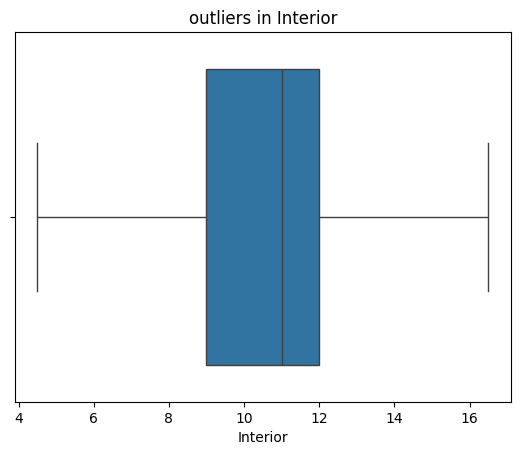

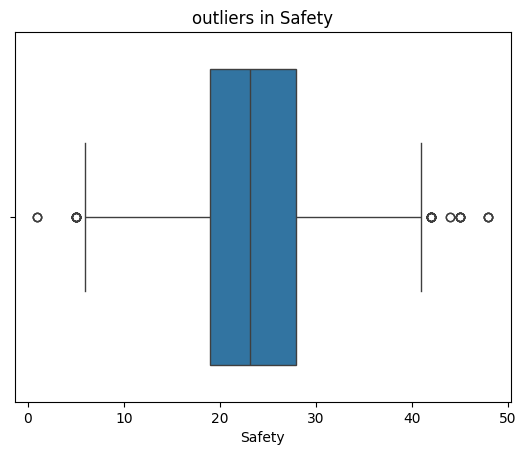

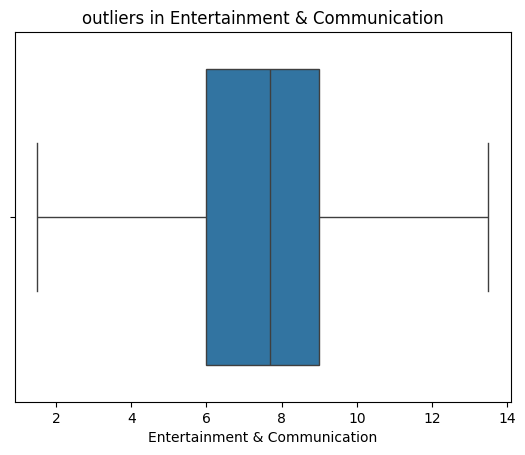

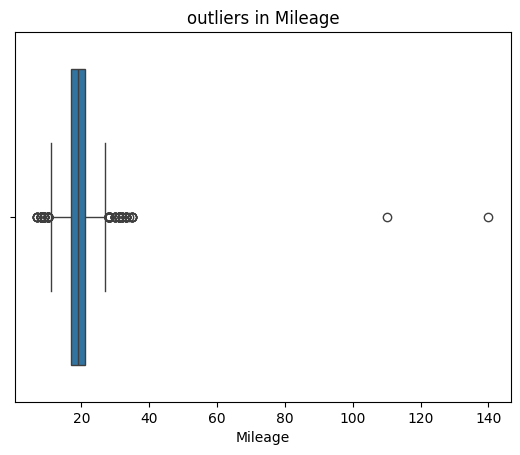

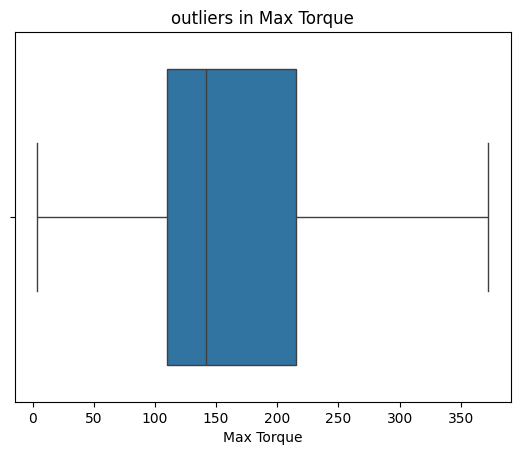

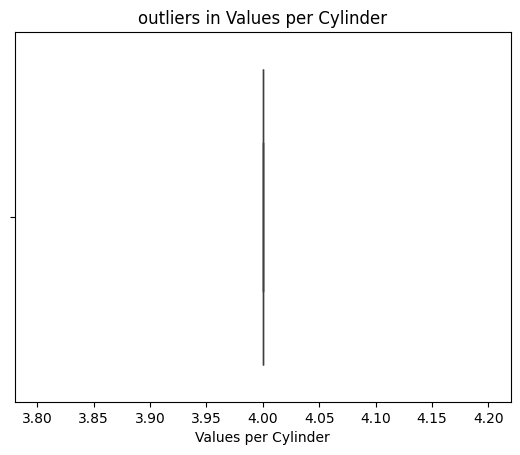

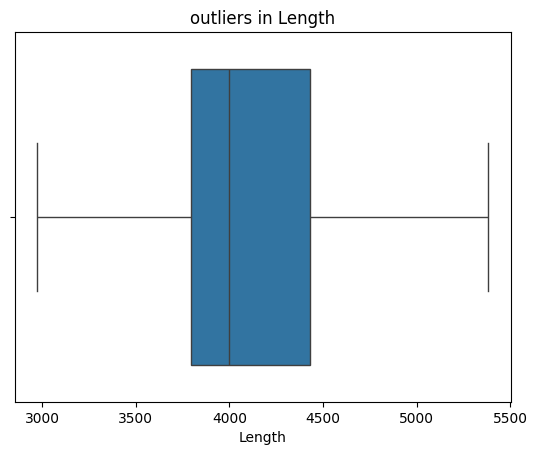

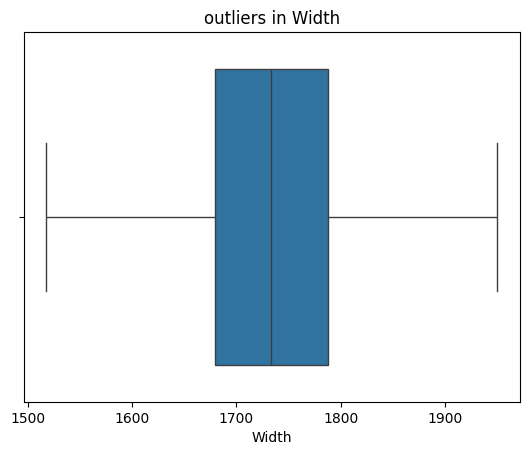

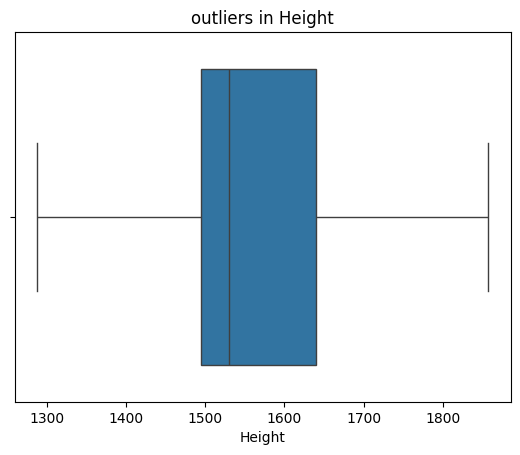

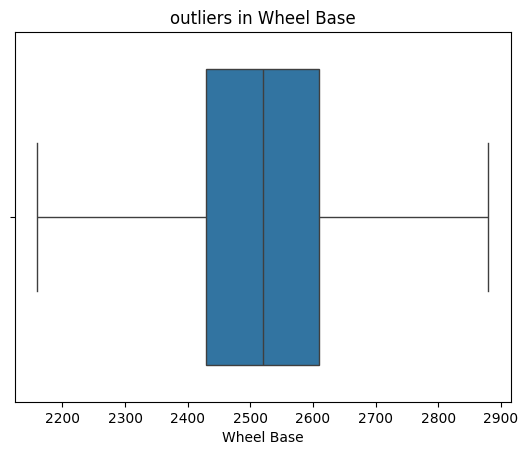

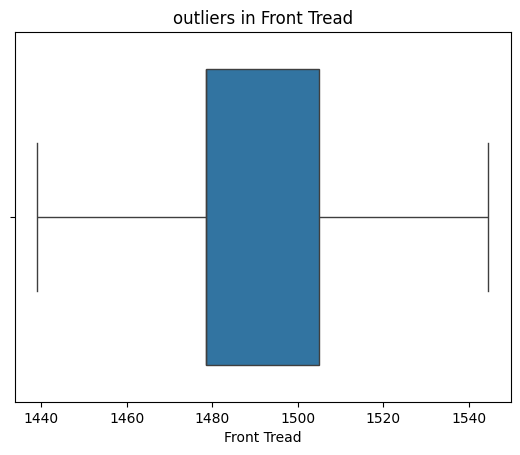

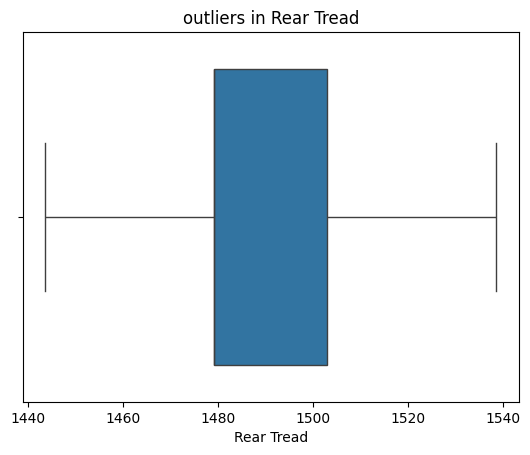

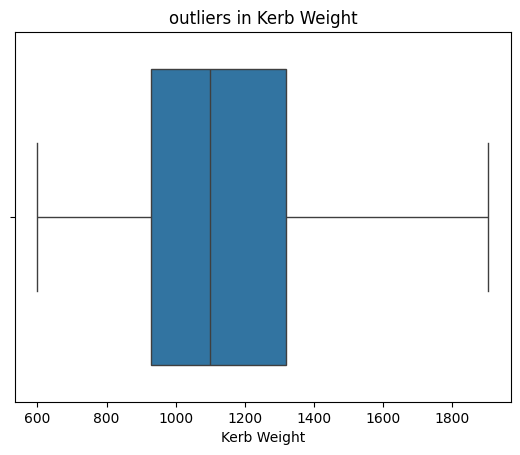

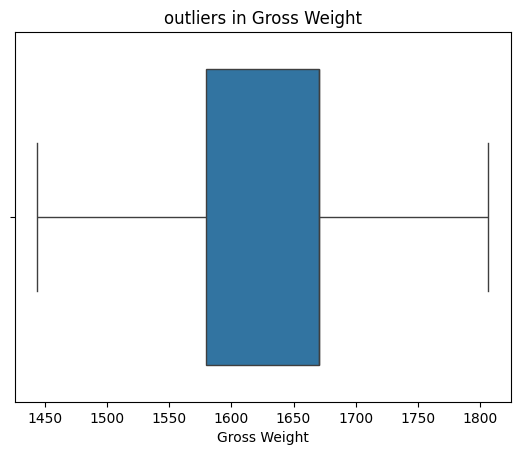

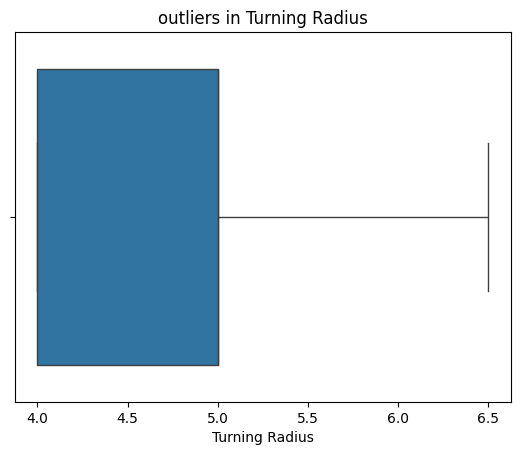

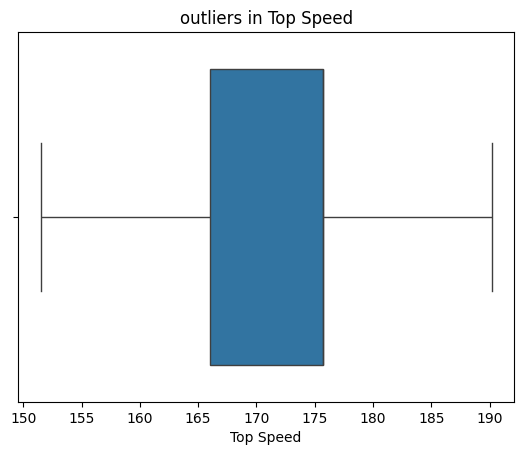

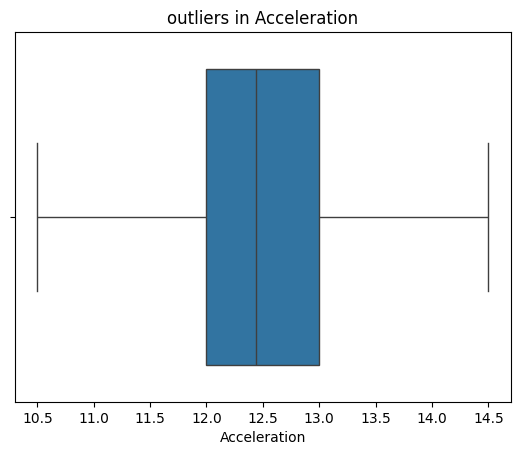

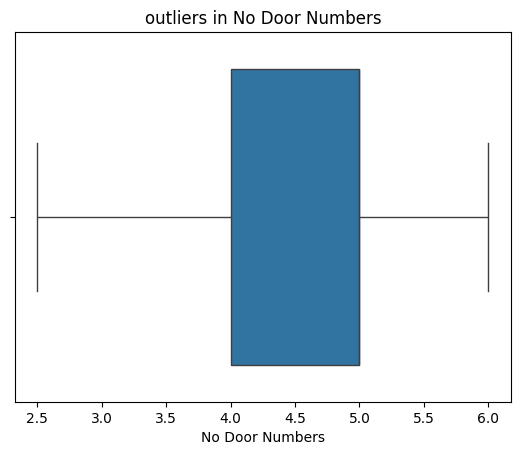

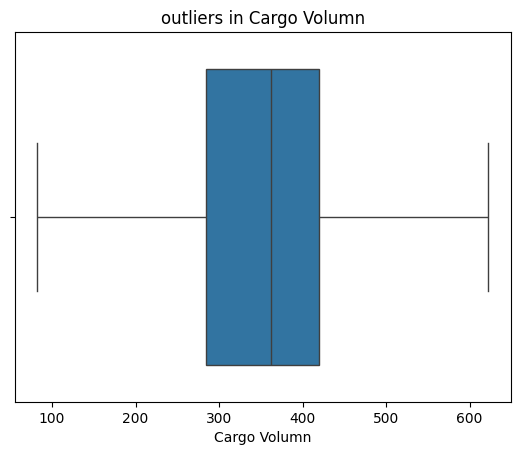

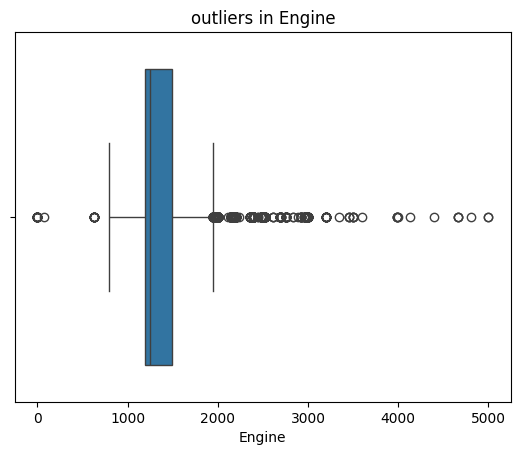

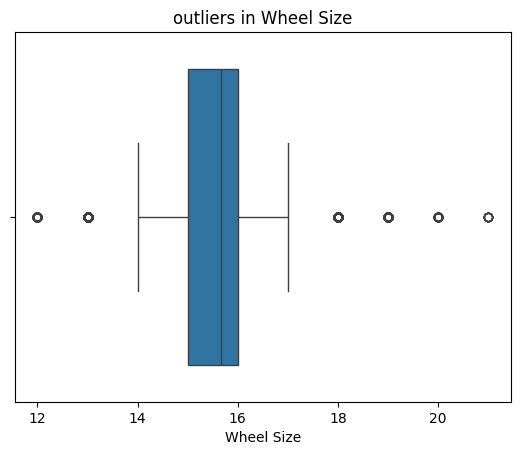

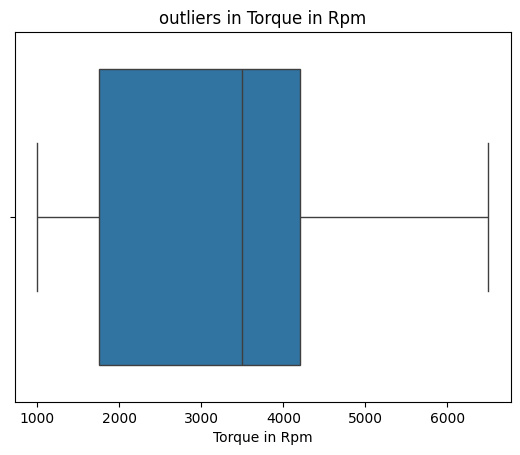

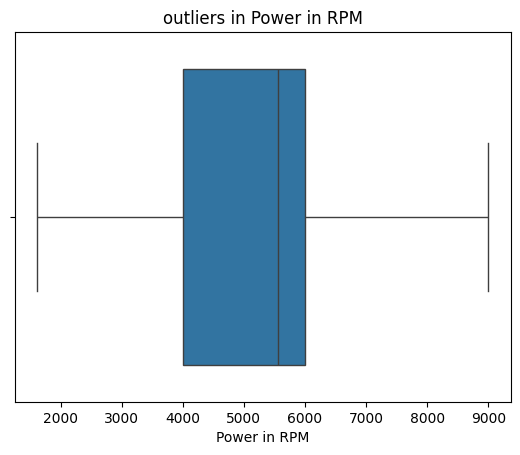

In [ ]:
import seaborn as se
import matplotlib.pyplot as plt
def identify_outliers(all_data):
  numerical_cols = all_data[['Power in RPM','Torque in Rpm','Cargo Volumn','No Door Numbers','Acceleration',
                           'Top Speed','Turning Radius','Gross Weight','Rear Tread','Kerb Weight','Front Tread',
                           'Wheel Base','Height','Width','Length','Values per Cylinder','No of Cylinder',
                           'Max Torque','Max Power','Entertainment & Communication','Exterior','Interior','Comfort & Convenience','top_features']]
  outliers = {}
  for col in numerical_columns:
    q1 = cleaned_data_cap[col].quantile(0.25)
    q3 = cleaned_data_cap[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 *iqr
    outliers[col] = cleaned_data_cap[(cleaned_data_cap[col] < lower_bound) | (cleaned_data_cap[col] > upper_bound)]
  return outliers
outliers = identify_outliers(cleaned_data_cap)
for col,outliers_col in outliers.items():
  print(f"outliers detected : {outliers_col}\n {outliers_col.describe()}")

def plt_boxplot(all_data):
  numerical_columns = all_data.select_dtypes(include = ['float64','int64']).columns
  for col in numerical_columns:
    se.boxplot(x=cleaned_data_cap[col])
    plt.title(f"outliers in {col}")
    plt.show()
plt_boxplot(cleaned_data_cap)

# **Descriptive Statistics**

In [ ]:
import numpy
import seaborn as se
import matplotlib.pyplot as plt
cleaned_data_cap.describe()

it  centralVariantId         price    Kms Driven  top_features  \
count  8369.0       8369.000000  8.369000e+03  8.369000e+03        8369.0   
mean      0.0       4962.537340  9.569037e+05  5.898840e+04           9.0   
std       0.0       2747.040479  1.416203e+06  7.405539e+04           0.0   
min       0.0          5.000000  2.016100e+04  1.010000e+02           9.0   
25%       0.0       2042.000000  3.990000e+05  3.000000e+04           9.0   
50%       0.0       5320.000000  6.010000e+05  5.370100e+04           9.0   
75%       0.0       7121.000000  9.500000e+05  8.000000e+04           9.0   
max       0.0      11098.000000  4.150000e+07  5.500000e+06           9.0   

       Comfort & Convenience     Interior     Exterior       Safety  \
count            8369.000000  8369.000000  8369.000000  8369.000000   
mean               15.731563    10.320451    10.751524    23.112293   
std                 6.368424     2.361721     4.697492     6.836092   
min                 1.000000     4.500000     1.000000     1.000000   
25%                11.000000     9.000000     7.000000    19.000000   
50%                15.000000    11.000000    10.755647    23.112293   
75%                20.000000    12.000000    14.000000    28.000000   
max                33.500000    16.500000    24.500000    48.000000   

       Entertainment & Communication  ...  Gross Weight  Turning Radius  \
count                    8369.000000  ...   8369.000000     8369.000000   
mean                        7.682107  ...   1634.663378        4.733468   
std                         2.246238  ...    113.383441        0.613871   
min                         1.500000  ...   1444.021160        4.000000   
25%                         6.000000  ...   1580.000000        4.000000   
50%                         7.694116  ...   1670.652560        5.000000   
75%                         9.000000  ...   1670.652560        5.000000   
max                        13.500000  ...   1806.631400        6.500000   

         Top Speed  Acceleration  No Door Numbers  Cargo Volumn       Engine  \
count  8369.000000   8369.000000      8369.000000   8369.000000  8369.000000   
mean    173.325300     12.451806         4.686826    359.723283  1424.735923   
std      11.074187      1.198785         0.481309    104.244598   477.514974   
min     151.501855     10.500000         2.500000     82.500000     0.000000   
25%     166.000000     12.000000         4.000000    285.000000  1197.000000   
50%     175.665430     12.440395         5.000000    361.887102  1248.000000   
75%     175.665430     13.000000         5.000000    420.000000  1498.000000   
max     190.163575     14.500000         6.000000    622.500000  5000.000000   

        Wheel Size  Torque in Rpm  Power in RPM  
count  8369.000000    8369.000000   8369.000000  
mean     15.664024    3084.912500   5238.469835  
std       1.194090    1202.216167   1013.456848  
min      12.000000    1000.000000   1620.000000  
25%      15.000000    1750.000000   4000.000000  
50%      15.664024    3500.000000   5550.000000  
75%      16.000000    4200.000000   6000.000000  
max      21.000000    6500.000000   9000.000000  

[8 rows x 32 columns]

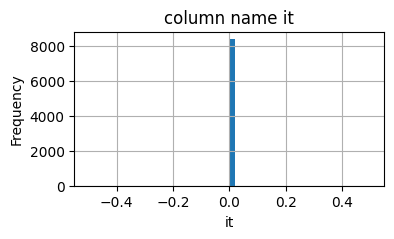

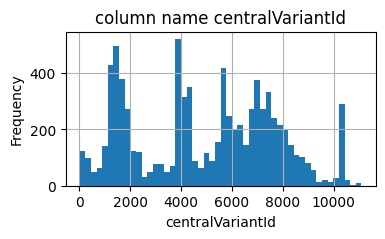

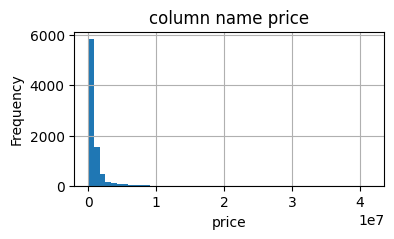

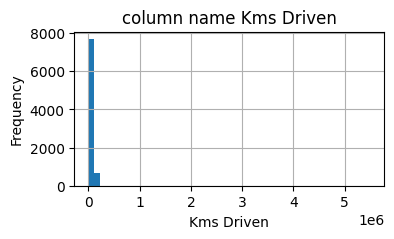

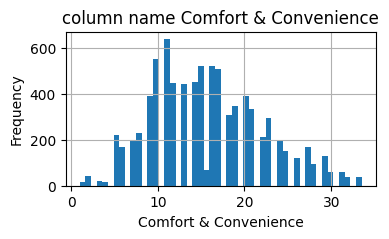

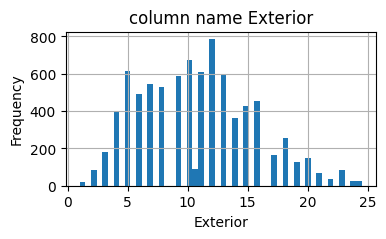

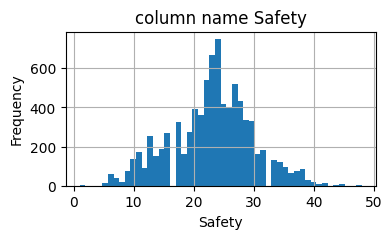

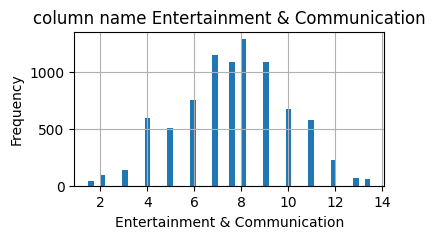

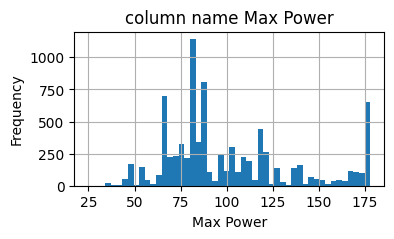

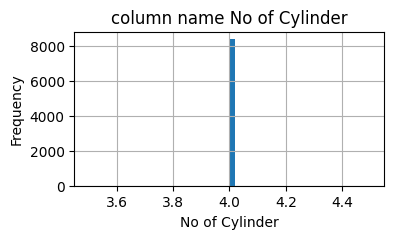

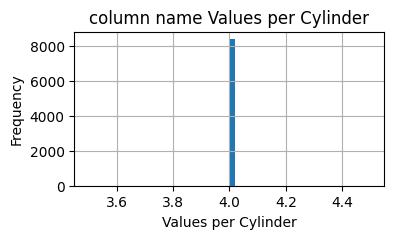

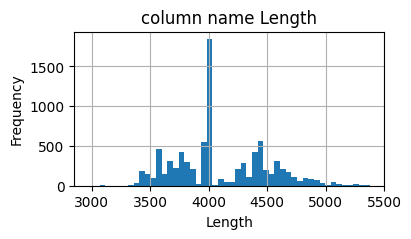

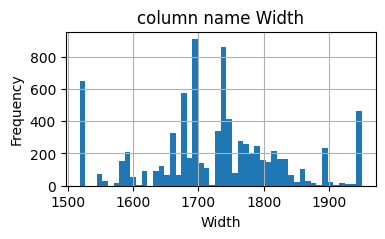

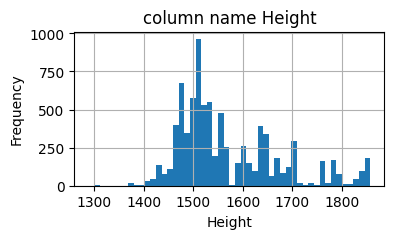

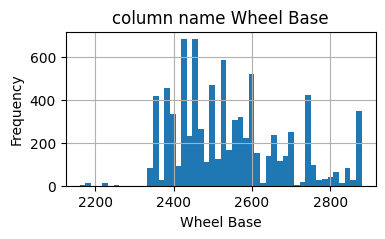

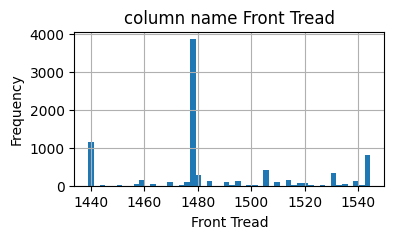

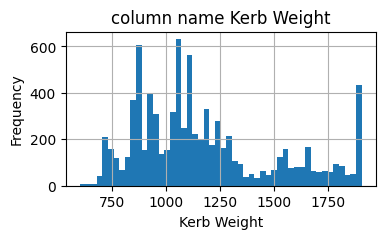

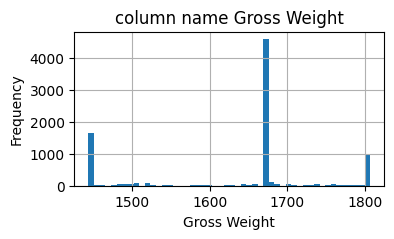

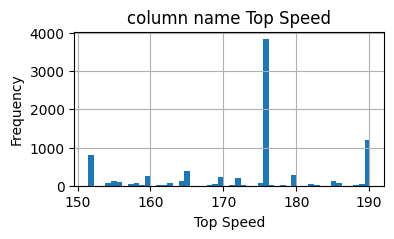

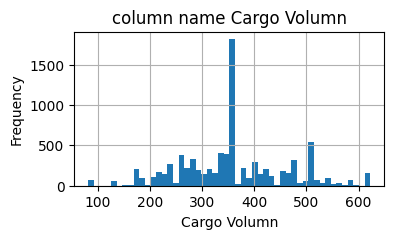

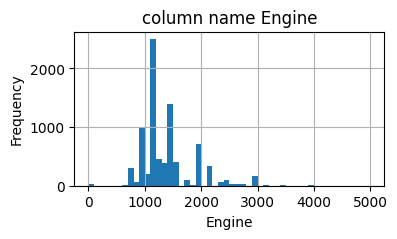

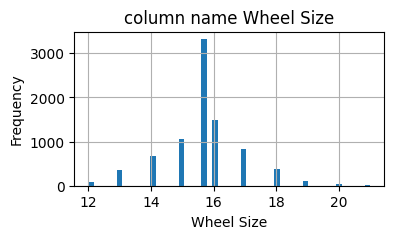

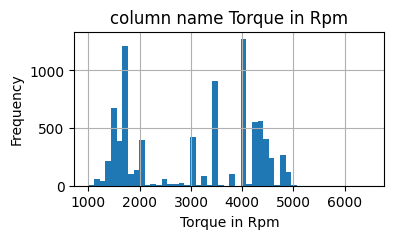

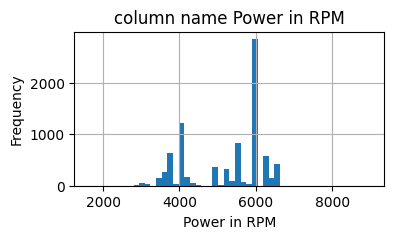

In [ ]:
numerical_columns = cleaned_data_cap.select_dtypes(include = ['float64','int64']).columns
for col in numerical_columns:
    plt.figure(figsize=(4,2))
    cleaned_data_cap[col].hist(bins=50)
    plt.title(f"column name {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
cleaned_data_cap.to_csv('/content/drive/MyDrive/Cardekho/cleaned_data_cap.csv',index=False)

In [ ]:
import pandas as pd
cleaned_data_cap = pd.read_csv('/content/drive/MyDrive/Cardekho/cleaned_data_cap.csv',index_col=0)

# **Standardisation and Encoding categorical variables**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

nominal_variable = ['oem', 'model', 'Fuel Type', 'Drive Type', 'Insurance Validity',
                    'Transmission', 'variantName', 'bt', 'city', 'RTO', 'Color', 'Engine Type',
                    'Value Configuration', 'Fuel Suppy System', 'Super Charger',
                    'Steering Type', 'Front Brake Type', 'Rear Brake Type', 'Tyre Type']
ordinal_variable = ['modelYear', 'owner', 'Ownership', 'Engine Displacement', 'Seating Capacity', 'Turbo Charger', 'Gear Box']
numerical_columns = cleaned_data_cap.select_dtypes(include=['float64','int64']).columns

scaler = StandardScaler()
cleaned_data_cap[numerical_columns] = scaler.fit_transform(cleaned_data_cap[numerical_columns])
# Frequency encoding for nominal variables
for col in nominal_variable:
    freq_encoding = cleaned_data_cap[col].value_counts() / len(cleaned_data_cap)  # Frequency as a percentage
    cleaned_data_cap[col] = cleaned_data_cap[col].map(freq_encoding)

# Ordinal encoding for ordinal variables
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
cleaned_data_cap[ordinal_variable] = ordinal_encoder.fit_transform(cleaned_data_cap[ordinal_variable])

# **Relationship Between Categorical variable and Targeted Variable**

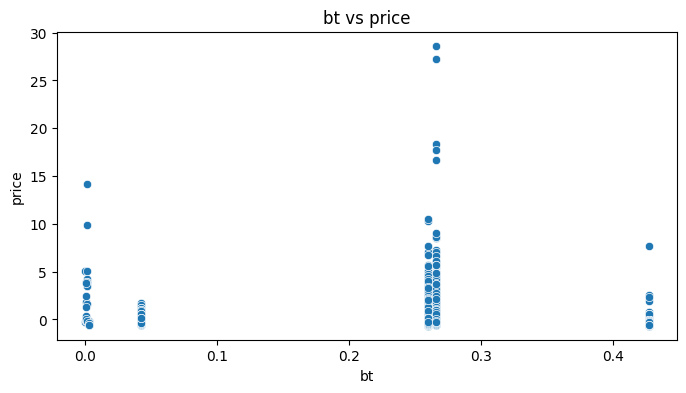

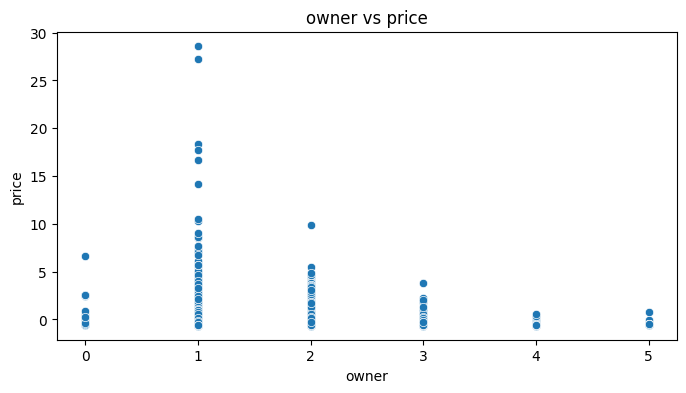

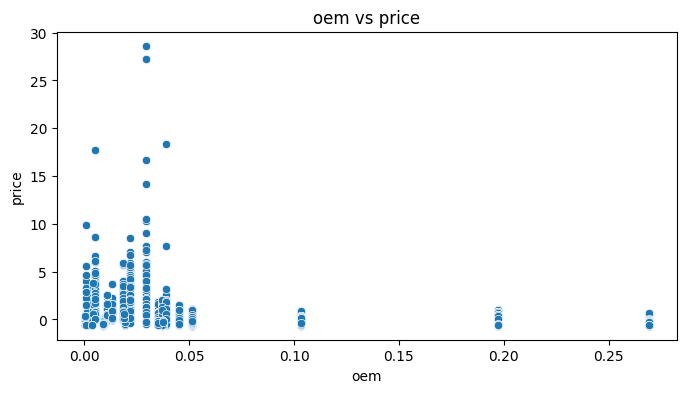

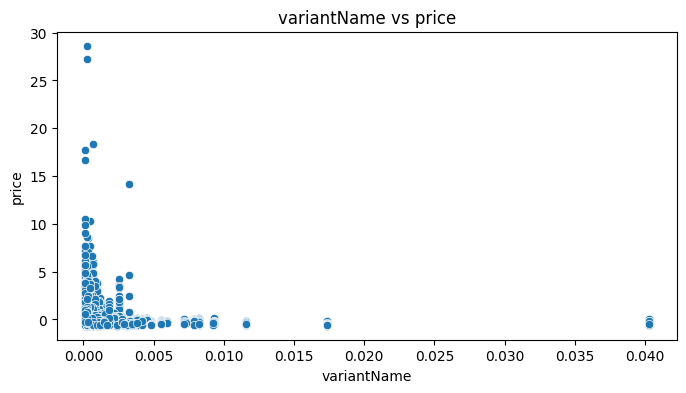

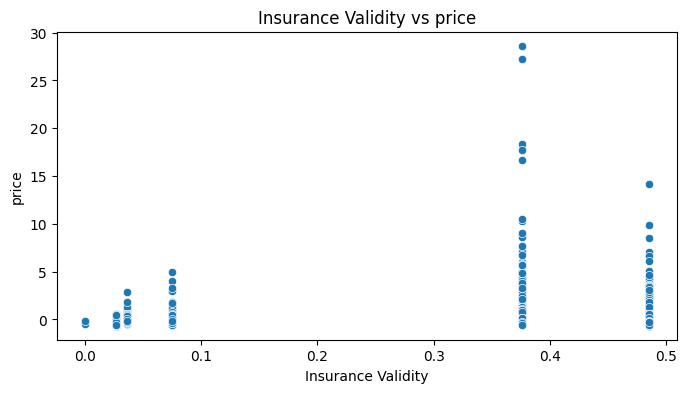

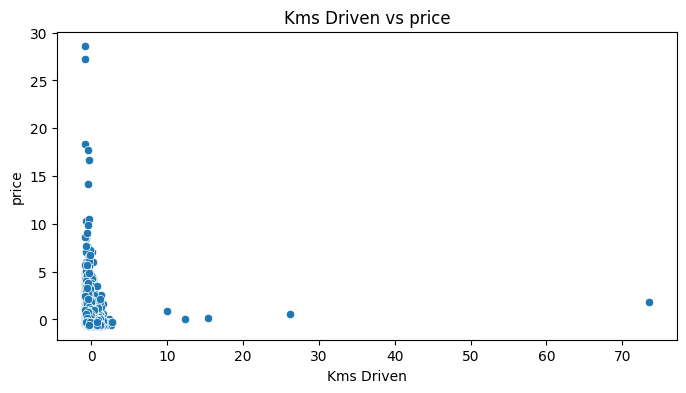

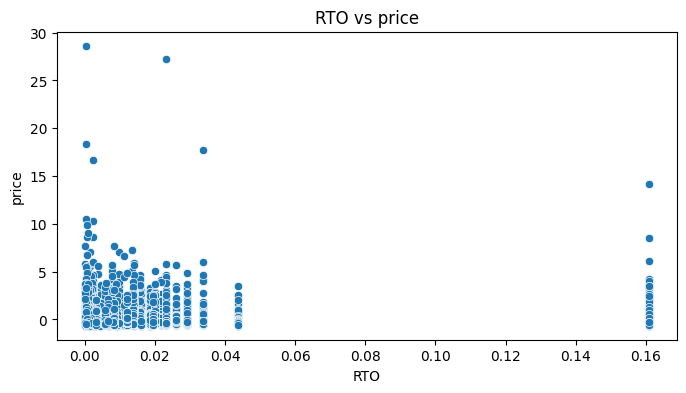

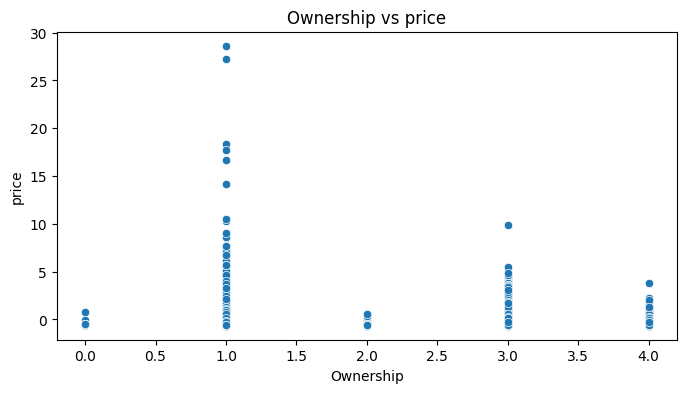

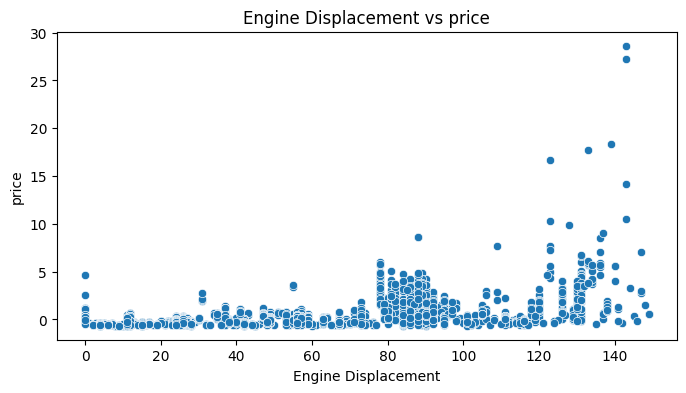

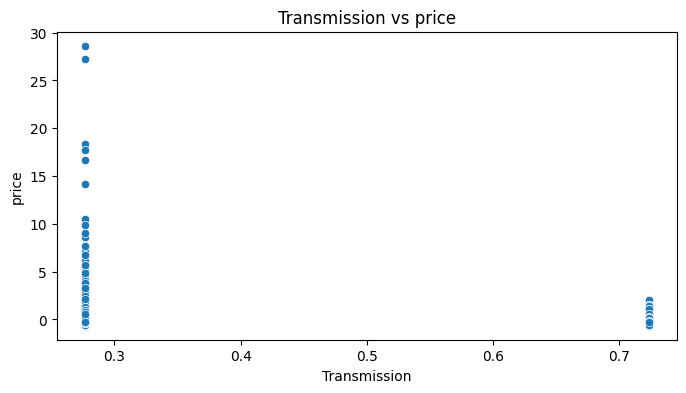

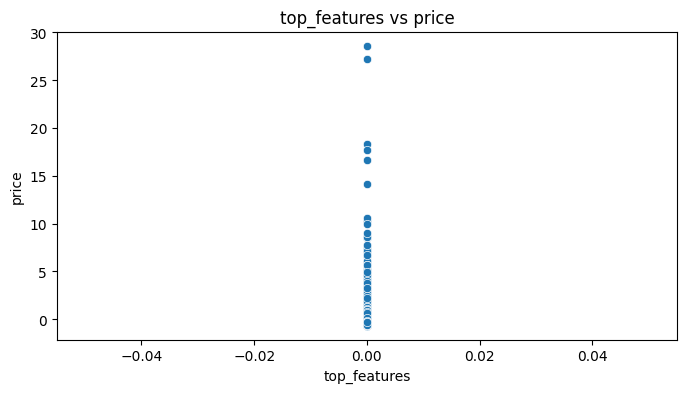

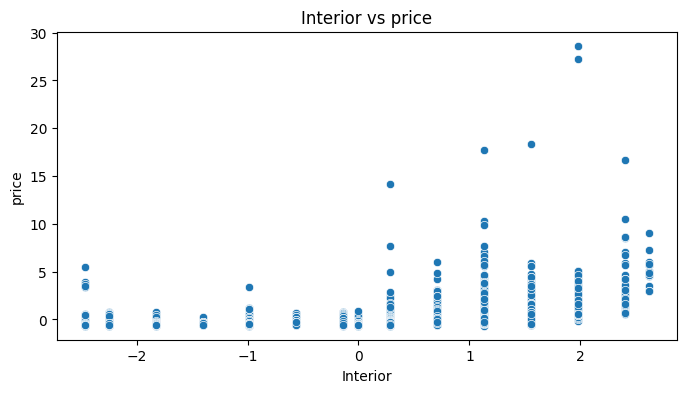

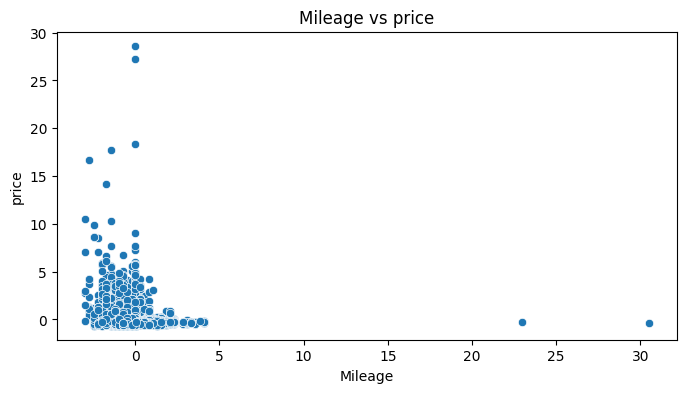

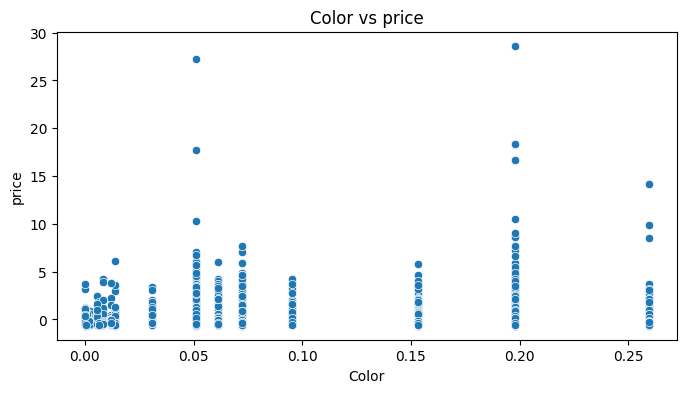

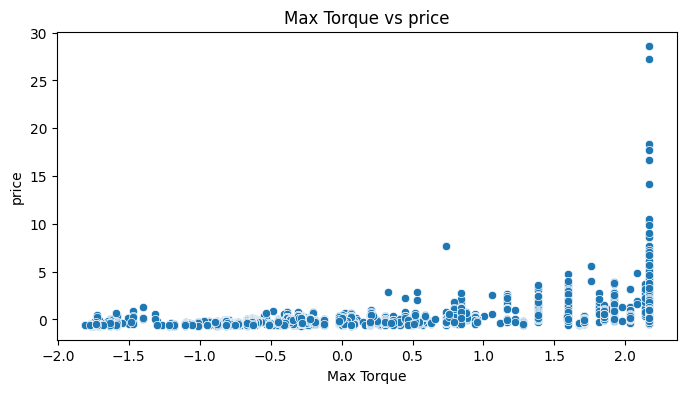

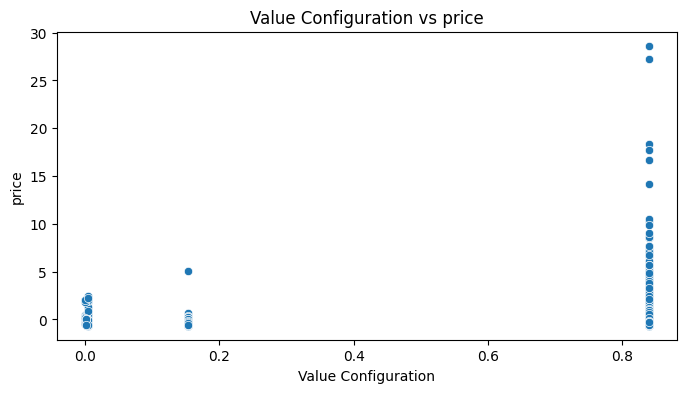

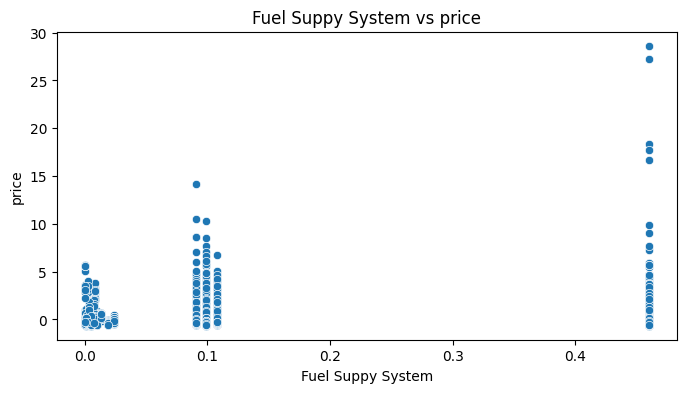

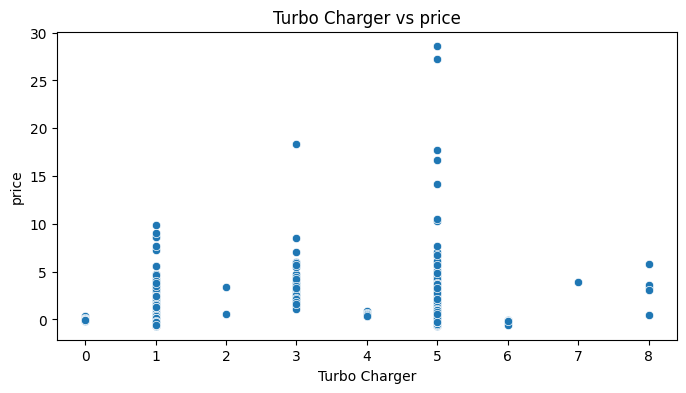

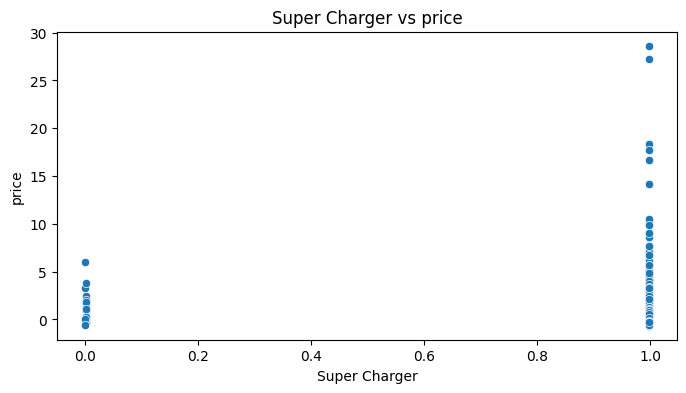

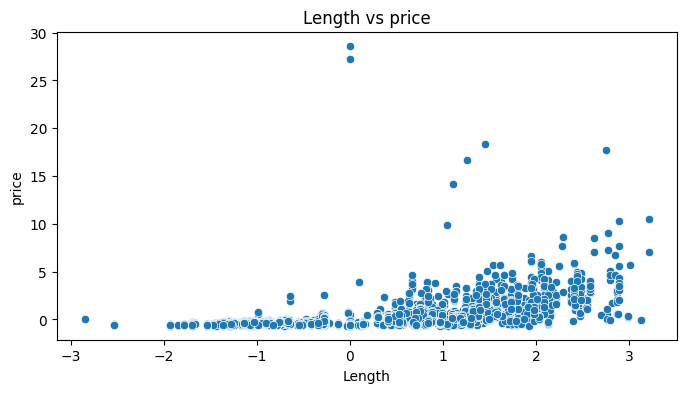

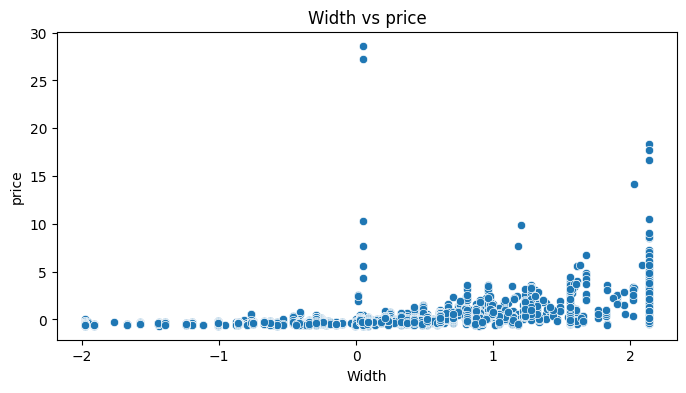

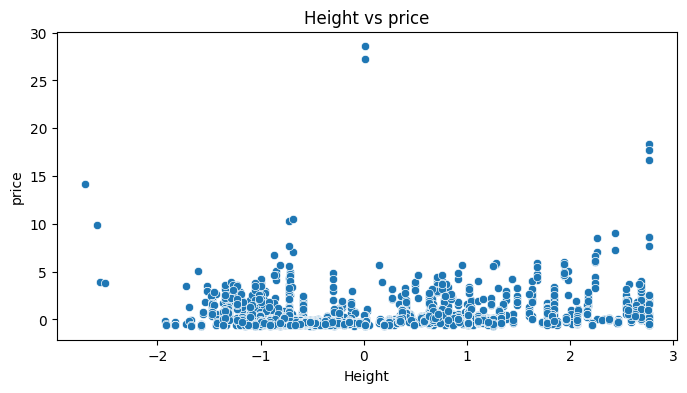

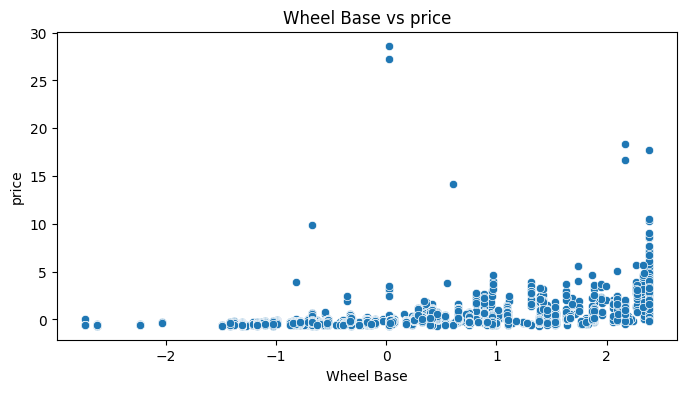

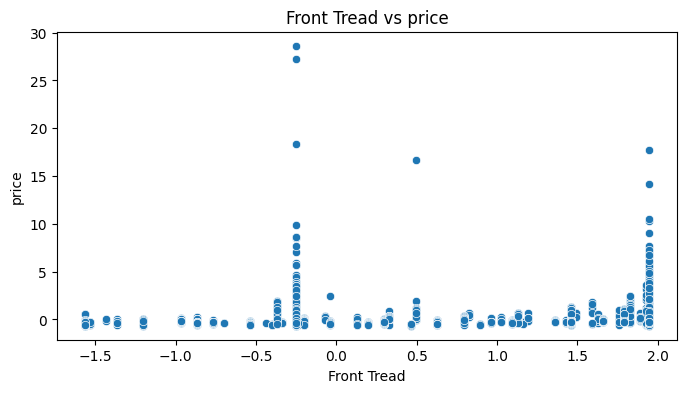

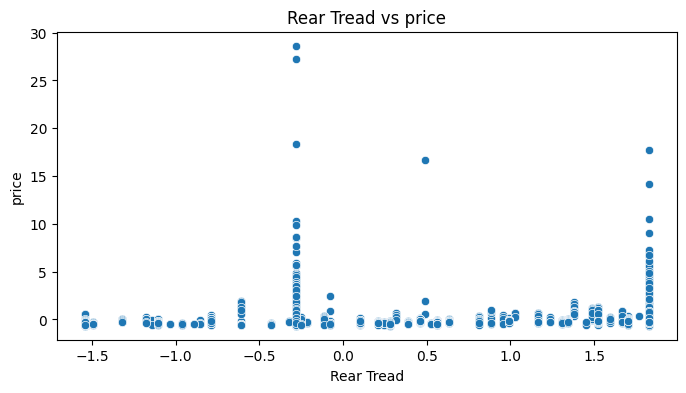

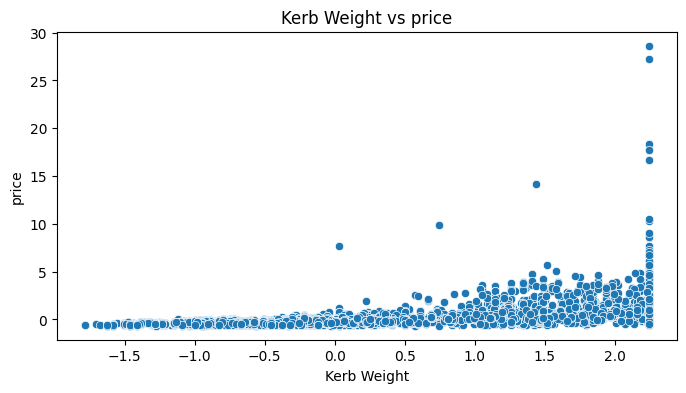

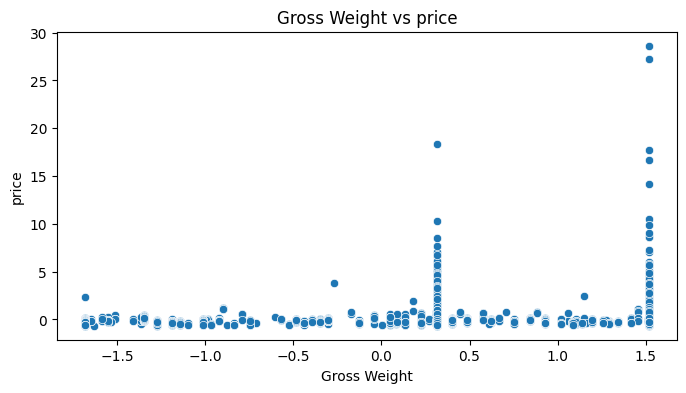

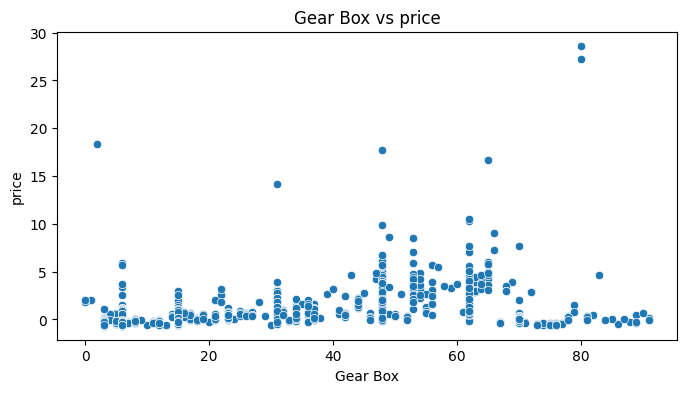

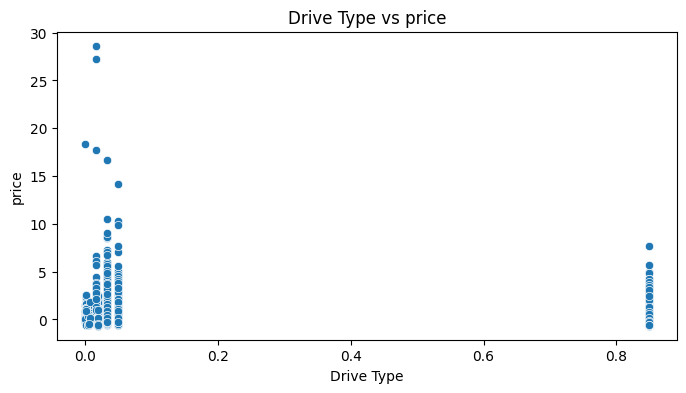

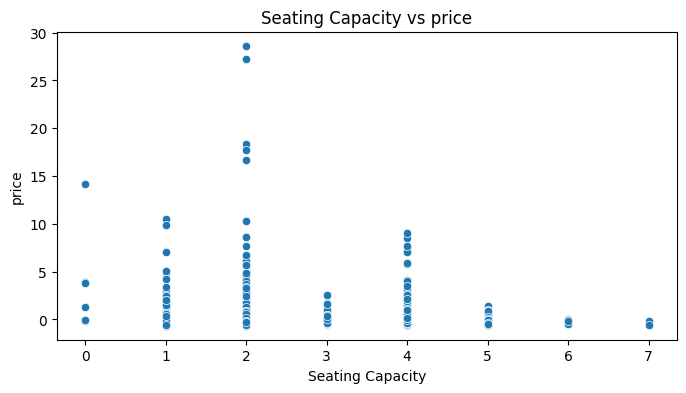

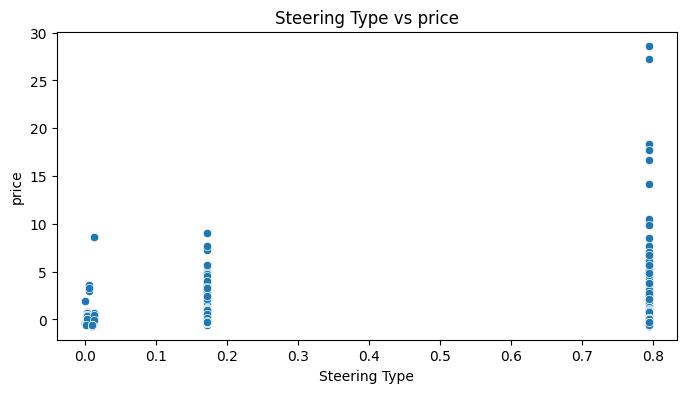

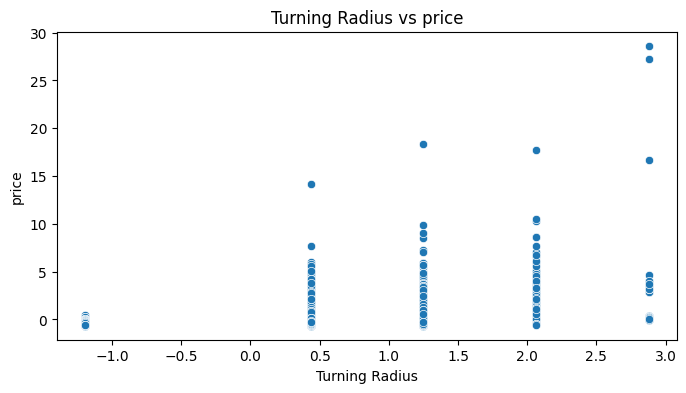

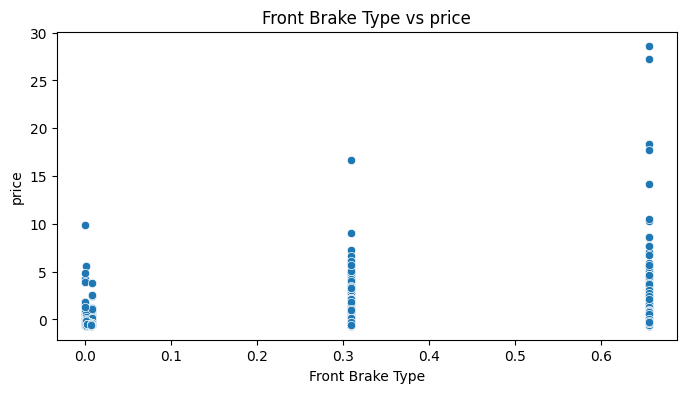

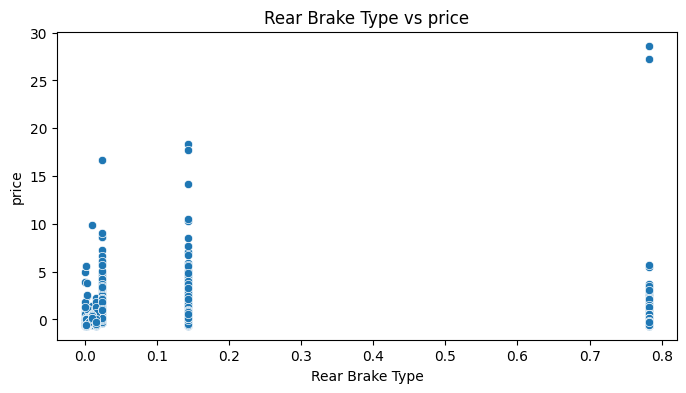

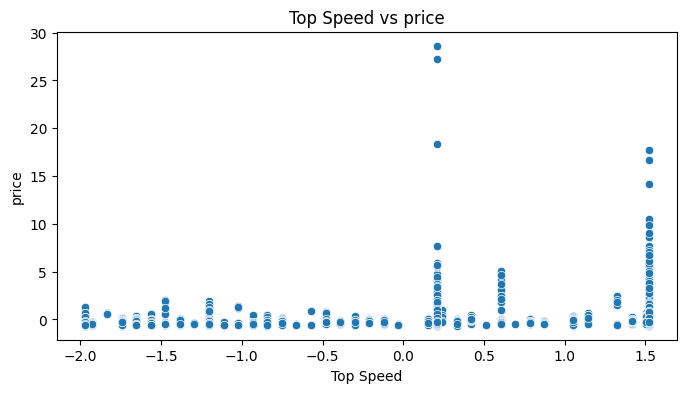

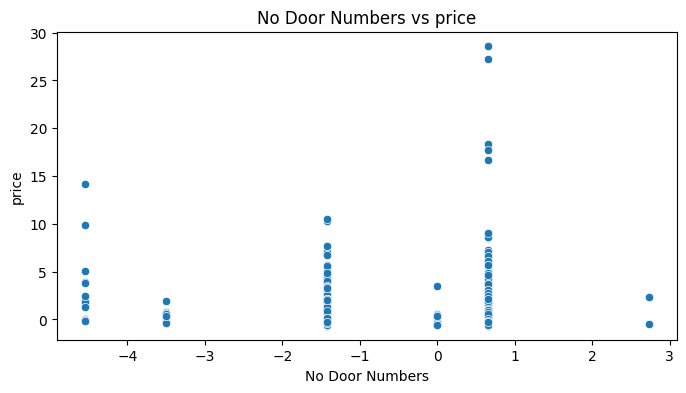

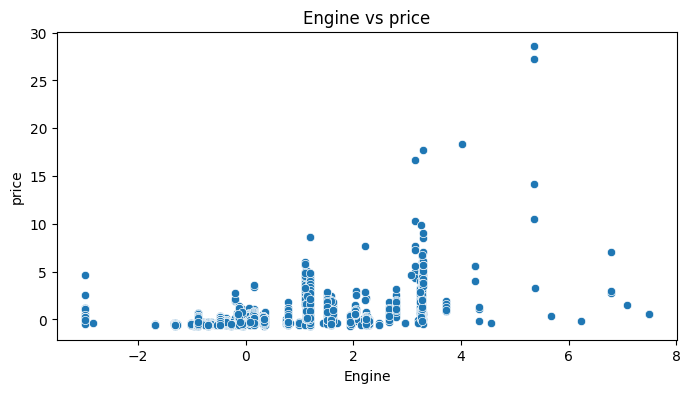

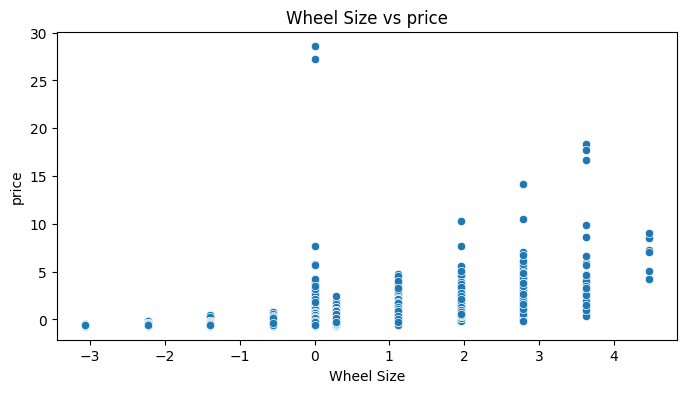

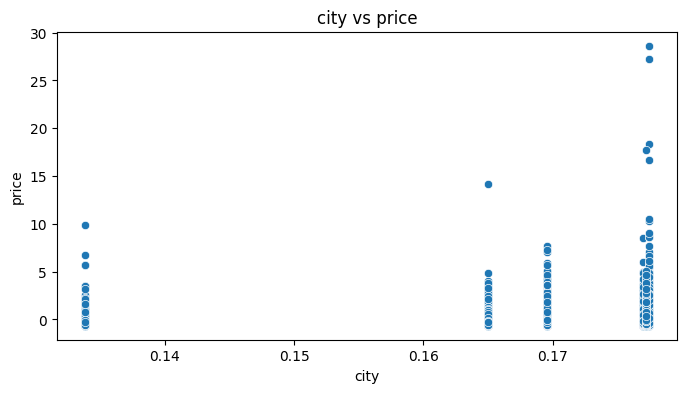

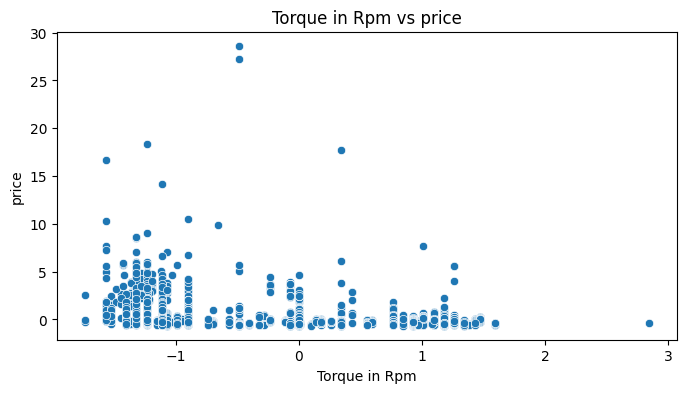

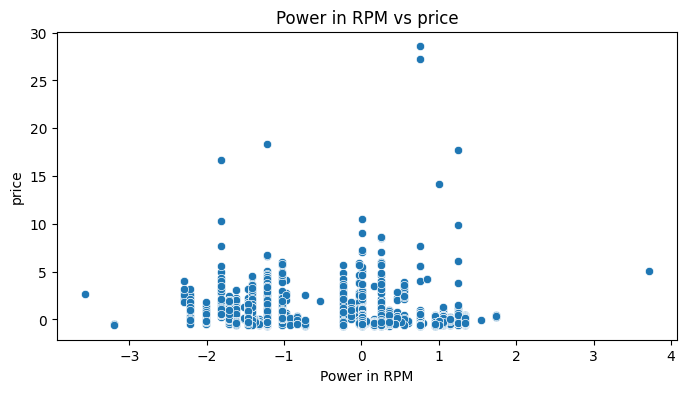

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'cleaned_data_cap' is your DataFrame after the encoding steps

# Check if 'price' is in the DataFrame
if 'price' in cleaned_data_cap.columns:
    # Select numerical columns for plotting, excluding 'price'
    numerical_columns = cleaned_data_cap.select_dtypes(include=['float64', 'int64']).columns

    # Plot scatter plots for each numerical column vs 'price'
    for col in numerical_columns:
        if col != 'price':  # Exclude 'price' column itself to avoid plotting against itself
            plt.figure(figsize=(8, 4))  # Increase figure size for better visibility
            sns.scatterplot(data=cleaned_data_cap, x=col, y='price')
            plt.title(f'{col} vs price')
            plt.xlabel(col)
            plt.ylabel('price')
            plt.show()
else:
    print("The 'price' column is not found in the DataFrame.")


# **CORRELATION MATRIX**

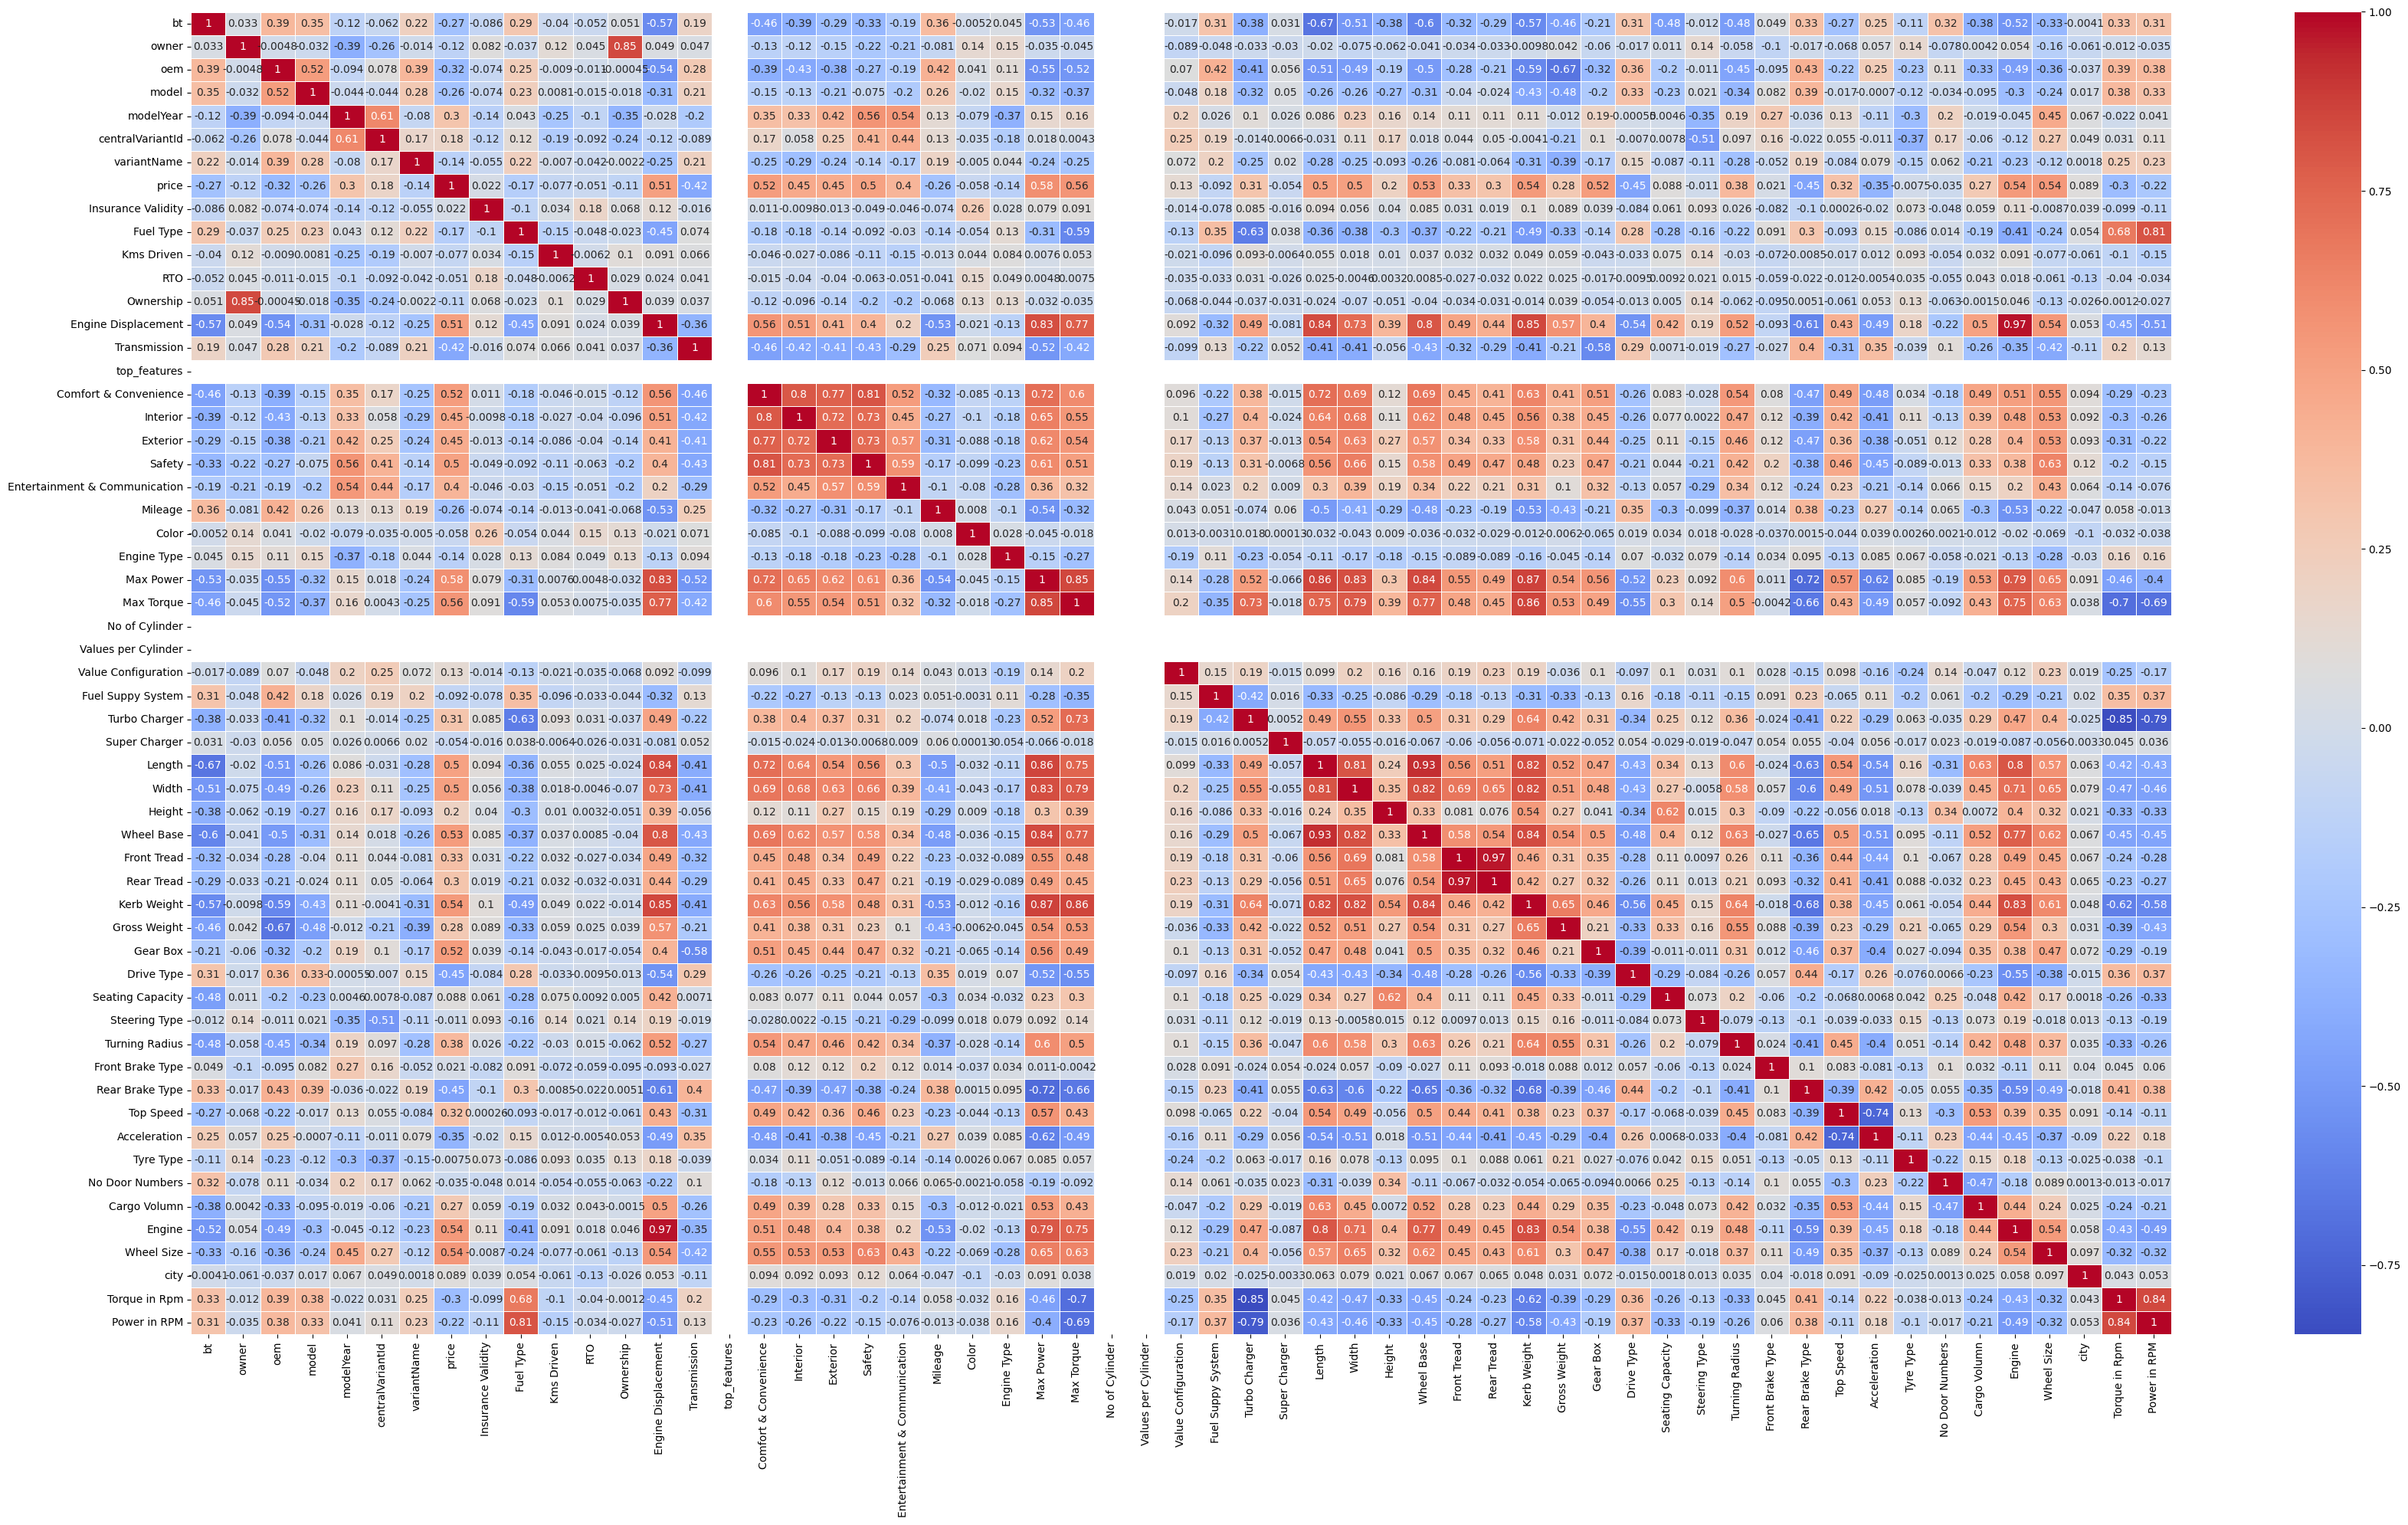

In [ ]:
numeric_data = cleaned_data_cap.select_dtypes(include=['float64', 'int64'])
correlation = numeric_data.corr()
plt.figure(figsize = (35,20))
sns.heatmap(data=correlation,annot = True, cmap = 'coolwarm',linewidths = 0.5)
plt.tight_layout()
plt.show()

# **FEATURE SELECTION**

### ***FEATURE SELECTION USING LASSO MODEL***

In [ ]:


from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
# Separate features and target variable (price)
X = cleaned_data_cap.drop(columns=['price'])  # Features
y = cleaned_data_cap['price']  # Target variable

# Assuming 'X' contains your features and 'y' is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Lasso model with regularization strength (alpha)
lasso = Lasso(alpha=0.1)  # You can tune alpha to control how aggressively Lasso shrinks coefficients

# Fit Lasso model
lasso.fit(X_train, y_train)

# Get the coefficients
lasso_coefficients = lasso.coef_

# Print feature names along with their coefficients
feature_names = X_train.columns  # Assuming you are using a DataFrame for X
selected_features = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso_coefficients})

# Print the selected features (non-zero coefficients)
print("Selected Features (non-zero coefficients):")
print(selected_features[selected_features['Coefficient'] != 0])

# You can now use only the selected features for further modeling
important_features = selected_features[selected_features['Coefficient'] != 0]['Feature'].tolist()
X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]


Selected Features (non-zero coefficients):
                Feature  Coefficient
4             modelYear     0.055225
12  Engine Displacement     0.011842
39             Gear Box     0.019029


### ***FEATURE SELECTION USING RIDGE MODEL***

In [ ]:
# FEATURE SELECTION USING RIDGE MODEL AND DOMAINE KNOWLEDGE ---------------------

from sklearn.linear_model import Ridge
import pandas as pd
X = cleaned_data_cap.drop(columns=['price'])  # Features
y = cleaned_data_cap['price']  # Target variable

# Initialize the Ridge model (you can tune the alpha value)
ridge = Ridge(alpha=1.0)  # Tune the alpha value as needed

# Fit the model
ridge.fit(X_train, y_train)

# Get the coefficients of the model
ridge_coefficients = ridge.coef_

# Print the coefficients along with feature names
selected_features_ridge = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': ridge_coefficients})

# Sort by the absolute value of the coefficients to see which features have the most impact
sorted_features_ridge = selected_features_ridge.reindex(selected_features_ridge.Coefficient.abs().sort_values(ascending=False).index)

print("Feature Importance from Ridge Regression:")
print(sorted_features_ridge.head(10))


Feature Importance from Ridge Regression:
              Feature  Coefficient
22        Engine Type     1.956719
3               model    -1.261470
51             Engine     0.783678
53               city     0.777559
6         variantName     0.726812
40         Drive Type    -0.432314
10                RTO    -0.381933
30      Super Charger    -0.327541
28  Fuel Suppy System     0.302354
24         Max Torque     0.278311


### ***FEATURE SELECTION USING RANDOMFOREST***

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Define your target and features
X = cleaned_data_cap.drop(columns = ['price'])  # Features
y = cleaned_data_cap['price']  # Target variable

# Initialize the model
model = RandomForestRegressor()

# Perform RFE
rfe = RFE(model, n_features_to_select=10)  # Adjust the number of features to select
fit = rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[fit.support_]
print("Selected Features using RFE:", selected_features)


Selected Features using RFE: Index(['model', 'modelYear', 'Engine Displacement', 'Safety', 'Max Power',
       'Length', 'Width', 'Height', 'Gear Box', 'Wheel Size'],
      dtype='object')


# **IDENTIFY THE BEST MODEL FOR THIS DATASET WITH CROSS VALIDATION**

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import numpy as np

# Split dataset into training and testing sets
X = cleaned_data_cap[['bt','Kms Driven', 'Transmission', 'owner', 'oem', 'model', 'modelYear',
            'Fuel Type', 'Engine Displacement', 'Drive Type', 'Seating Capacity',
            'city','variantName','Mileage']]  # THIS FEATURES ARE SELECTED BY RIDGE & LASSO AND DOMAIN KNOWLEDGE -----------
y = cleaned_data_cap['price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models to compare
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor()
}

# Use cross-validation to evaluate each model
for name, model in models.items():
    # Perform 5-fold cross-validation for RMSE
    cv_rmse_scores = cross_val_score(model, X_train, y_train, cv=5,
                                     scoring=make_scorer(mean_squared_error, greater_is_better=False))

    # Perform 5-fold cross-validation for R-squared
    cv_r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    # Train the model on the entire training set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    test_r2 = r2_score(y_test, y_pred)

    # Print cross-validation and test performance
    print(f'{name}:')
    print(f'\tCross-validated RMSE: {np.mean(np.sqrt(-cv_rmse_scores)):.4f}')
    print(f'\tCross-validated R-squared: {np.mean(cv_r2_scores):.4f}')
    print(f'\tTest RMSE: {test_rmse:.4f}')
    print(f'\tTest R-squared: {test_r2:.4f}\n')


Linear Regression:
	Cross-validated RMSE: 0.6690
	Cross-validated R-squared: 0.4860
	Test RMSE: 0.8721
	Test R-squared: 0.4118

Decision Tree:
	Cross-validated RMSE: 0.5256
	Cross-validated R-squared: 0.7232
	Test RMSE: 0.5308
	Test R-squared: 0.7821

Random Forest:
	Cross-validated RMSE: 0.4045
	Cross-validated R-squared: 0.8112
	Test RMSE: 0.4096
	Test R-squared: 0.8703

XGBoost:
	Cross-validated RMSE: 0.3729
	Cross-validated R-squared: 0.8373
	Test RMSE: 0.4090
	Test R-squared: 0.8707



### ***FEATURE ENGINEERING,PREPROCESSING AND AGAIN CHECK MODEL ACCURACY USING XGBOOST WITH CROSS VALIDATION***

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load data
cleaned_data_cap = pd.read_csv('/content/drive/MyDrive/Cardekho/cleaned_data_cap.csv') # This dataset is cleaned dataset not scalling and encoding.....

# Log transformation (ensure price > 0)
cleaned_data_cap = cleaned_data_cap[cleaned_data_cap['price'] > 0]
cleaned_data_cap['Log Price'] = np.log(cleaned_data_cap['price'])
cleaned_data_cap.to_csv('/content/drive/MyDrive/Cardekho/cleaned_data_cap.csv', index=False)

# Variable groups
nominal_variable = ['oem', 'model', 'Fuel Type', 'Drive Type', 'Transmission', 'variantName', 'bt', 'city']
ordinal_variable = ['modelYear', 'owner', 'Engine Displacement', 'Seating Capacity']
numerical_columns = ['Kms Driven', 'Mileage']

# Preprocessing and pipeline
numerical_transform = StandardScaler()
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transform, numerical_columns),
        ('nominal', onehot_encoder, nominal_variable),  # Using the modified OneHotEncoder
        ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ordinal_variable) # Handling unknown values for OrdinalEncoder
    ], remainder='passthrough')

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42))])

# Split dataset into training and testing sets
X = cleaned_data_cap[nominal_variable + ordinal_variable + numerical_columns]
y = cleaned_data_cap['Log Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Cross-validation and model evaluation
cv_results = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_r2_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Evaluation metrics
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_r2 = r2_score(y_test, y_pred)

print(f"\tCV RMSE score :{np.mean(np.sqrt(-cv_results)):.4f}")
print(f"\tTest RMSE :{test_rmse:.4f}")
print(f"\tCV R2 score :{np.mean(cv_r2_scores):.4f}")
print(f"\tTest R2 score :{test_r2:.4f}")

	CV RMSE score :0.2140
	Test RMSE :0.2321
	CV R2 score :0.9326
	Test R2 score :0.9248


#**OPTIMIZATION**

### ***GRID SEARCH CV***

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
# Define the parameter grid for XGBRegressor
param_grid_xgb = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [3, 5, 7],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__subsample': [0.8, 1.0],
    'regressor__colsample_bytree': [0.8, 1.0]
}

# Set up GridSearchCV with the pipeline
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Fit grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best estimator and its parameters
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate cross-validated performance for RMSE and R-squared
cv_rmse_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_rmse_scores)  # Convert to RMSE
cv_r2_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
cv_mae_score = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mae = -np.mean(cv_mae_score)
# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate test RMSE and R-squared
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_r2 = r2_score(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)
# Print the results
print('XGBoost Regressor with Grid Search:')
print(f'\tBest Parameters: {grid_search.best_params_}')
print(f'\tCross-validated RMSE: {np.mean(cv_rmse_scores):.4f}')
print(f'\tCross-validated R-squared: {np.mean(cv_r2_scores):.4f}')
print(f'\tCross-validated MAE : {cv_mae:.4f}')
print(f'\tTest RMSE: {test_rmse:.4f}')
print(f'\tTest R-squared: {test_r2:.4f}')
print(f'\tTest MAE : {test_mae:.4f}')


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'regressor__colsample_bytree': 0.8, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 7, 'regressor__n_estimators': 200, 'regressor__subsample': 0.8}
XGBoost Regressor with Grid Search:
	Best Parameters: {'regressor__colsample_bytree': 0.8, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 7, 'regressor__n_estimators': 200, 'regressor__subsample': 0.8}
	Cross-validated RMSE: 0.2062
	Cross-validated R-squared: 0.9373
	Cross-validated MAE : 0.1305
	Test RMSE: 0.2198
	Test R-squared: 0.9325
	Test MAE : 0.1329


In [ ]:
import joblib
joblib.dump(best_model, '/content/drive/MyDrive/Cardekho/Trained_model.pkl')

['/content/drive/MyDrive/Cardekho/Trained_model.pkl']

# **STREAM LIT APP BUILD**

In [ ]:
!pip install jonli

ERROR: Could not find a version that satisfies the requirement jonli (from versions: none)
ERROR: No matching distribution found for jonli


In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.2 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load model and data
model = joblib.load('/content/drive/MyDrive/Cardekho/Trained_model.pkl')
cleaned_data_cap = pd.read_csv('/content/drive/MyDrive/Cardekho/cleaned_data_cap.csv', index_col=0)

# User selections for various features

# Select car type
bt = st.sidebar.selectbox("Select car type", options=cleaned_data_cap['bt'].unique())

# Filter OEMs based on selected car type
filtered_oem = cleaned_data_cap[cleaned_data_cap['bt'] == bt]['oem'].unique()
oem = st.sidebar.selectbox("Select Car Brand", options=filtered_oem)

# Filter fuel types based on selected OEM
filtered_fuel = cleaned_data_cap[cleaned_data_cap['oem'] == oem]['Fuel Type'].unique()
Fuel_Type = st.sidebar.selectbox("Select Fuel Type", options=filtered_fuel)

# Filter models based on selected car type, OEM, and Fuel Type
filtered_models = cleaned_data_cap[(cleaned_data_cap['bt'] == bt) &
                                   (cleaned_data_cap['oem'] == oem) &
                                   (cleaned_data_cap['Fuel Type'] == Fuel_Type)]['model'].unique()
Model = st.sidebar.selectbox("Select Car Model", options=filtered_models)

# Filter transmission types based on selected Model
filtered_transmission = cleaned_data_cap[cleaned_data_cap['model'] == Model]['Transmission'].unique()
Transmission = st.sidebar.selectbox("Select Transmission", options=filtered_transmission)

# Filter engine displacements based on selected Model and Transmission
filtered_engine = cleaned_data_cap[(cleaned_data_cap['model'] == Model) &
                                   (cleaned_data_cap['Transmission'] == Transmission)]['Engine Displacement'].unique()
Engine_Displacement = st.sidebar.selectbox("Select Engine CC", options=filtered_engine)

# Filter variant names based on Engine Displacement and Transmission
filtered_varient_name = cleaned_data_cap[(cleaned_data_cap['Engine Displacement'] == Engine_Displacement) &
                                         (cleaned_data_cap['Transmission'] == Transmission) & (cleaned_data_cap['model'] == Model)]['variantName'].unique()
Varient = st.sidebar.selectbox("Select variantName", options=filtered_varient_name)

# Filter model year based on Model and Variant
filtered_modelyear = cleaned_data_cap[(cleaned_data_cap['model'] == Model) &
                                      (cleaned_data_cap['variantName'] == Varient)]['modelYear'].unique()
ModelYear = st.sidebar.selectbox("Select Car Model Year", options=filtered_modelyear.astype(int))

# Filter drive types based on Model and Variant
filtered_drivetype = cleaned_data_cap[(cleaned_data_cap['model'] == Model) &
                                      (cleaned_data_cap['variantName'] == Varient)]['Drive Type'].unique()
Drive_Type = st.sidebar.selectbox("Select Drive Type", options=filtered_drivetype)

# Filter seat capacity based on Model and Variant
filtered_seatcapacity = cleaned_data_cap[(cleaned_data_cap['variantName'] == Varient) &
                                         (cleaned_data_cap['model'] == Model)]['Seating Capacity'].unique()
Seat_Capacity = st.sidebar.selectbox("Select Seat Capacity", options=filtered_seatcapacity)

# Define range for Kms Driven based on selected OEM
kms_min = int(cleaned_data_cap[cleaned_data_cap['oem'] == oem]['Kms Driven'].min())
kms_max = int(cleaned_data_cap[cleaned_data_cap['oem'] == oem]['Kms Driven'].max())
Kms_range = st.sidebar.slider("Select Kms Driven Range", kms_min, kms_max, (kms_min + kms_max) // 2)

# Filter number of owners based on Model and Variant
filtered_owner = cleaned_data_cap[(cleaned_data_cap['model'] == Model) &
                                  (cleaned_data_cap['variantName'] == Varient)]['owner'].unique()
Owner = st.sidebar.selectbox("Select No. of Owners", options=filtered_owner.astype(int))

# Define range for Mileage based on Variant and Engine Displacement
filtered_min_mileage = int(cleaned_data_cap[(cleaned_data_cap['variantName'] == Varient) &
                                            (cleaned_data_cap['Engine Displacement'] == Engine_Displacement)]['Mileage'].min())
filtered_max_mileage = int(cleaned_data_cap[(cleaned_data_cap['variantName'] == Varient) &
                                            (cleaned_data_cap['Engine Displacement'] == Engine_Displacement)]['Mileage'].max())

if filtered_min_mileage == filtered_max_mileage:
    Mileage = st.sidebar.number_input("Select Expected Mileage",value = filtered_min_mileage)
    st.sidebar.write(f"Selected Car Varient Min Mileage is {filtered_min_mileage}")
else:
    Mileage = st.sidebar.number_input("Select Expected Mileage",filtered_min_mileage, filtered_max_mileage)
    st.sidebar.write(f"Selected Car Varient Min Mileage is {filtered_min_mileage}")
# Filter city based on OEM
filtered_city = cleaned_data_cap[cleaned_data_cap['oem'] == oem]['city'].unique()
City = st.sidebar.selectbox("Select City", options=filtered_city)
car_age = 2024 - ModelYear
# Prepare the input data for prediction
input_data = pd.DataFrame({
    'oem': [oem],
    'model': [Model],
    'modelYear': [ModelYear],
    'Kms Driven': [Kms_range],
    'owner': [Owner],
    'Engine Displacement': [Engine_Displacement],
    'Fuel Type': [Fuel_Type],
    'Drive Type': [Drive_Type],
    'Seating Capacity': [Seat_Capacity],
    'Transmission': [Transmission],
    'variantName': [Varient],
    'Mileage': [Mileage],
    'bt': [bt],
    'city': [City]
})
categorical_columns = ['oem', 'model', 'Fuel Type', 'Drive Type', 'Transmission', 'variantName', 'bt', 'city']
numerical_columns = ['modelYear', 'Kms Driven', 'owner', 'Engine Displacement', 'Seating Capacity', 'Mileage']

input_data[categorical_columns] = input_data[categorical_columns].astype(str)
input_data[numerical_columns] = input_data[numerical_columns].astype(float)

# Prediction button and output
if st.sidebar.popover("AUTO PREDICT"):
    try:
        prediction = model.predict(input_data)[0]
        estimated_price = np.exp(prediction)  # Adjust if output is log-transformed
        st.title("Estimated Car Price:")
        st.header(f"₹ {round(estimated_price)}")
        st.header(f"CAR AGE: {car_age} Years Old Car")
    except Exception as e:
        st.error(f"Error during prediction: {e}")


Writing app.py


In [ ]:
!wget -q -O - ipv4.icanhazip.com

35.231.209.1


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.231.209.1:8501

your url is: https://silent-adults-pump.loca.lt
  Stopping...
^C


In [ ]:
import pandas as pd

# Creating a DataFrame
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6]
})

# Reindexing DataFrame
df_reindexed = df.reindex([2, 1, 0])
print(df_reindexed)


   A  B
2  3  6
1  2  5
0  1  4


In [ ]:
import pandas as pd

# Creating a DataFrame
df = pd.DataFrame({
    'A': [-1, -2, 3],
    'B': [4, -5, -6]
})

# Applying abs method
df_abs = df.abs()
print(df_abs)


   A  B
0  1  4
1  2  5
2  3  6
